# Features selection procedures to support the replicability principle
## Cognitive, Behavioral & Social Data project

### A.Y. 2022/2023
### Students:
Matteo Mazzucato - 2019054 \
Ivan Piacere - 2058071 \
Valentina Signor - 2020356 \
Riccardo Carangelo - 2057432

## Introduction
Personality tests may be useful in many fields in order to get a qualitative idea of a person
behavior. There are several methods of personality assessment, and each of these can use or focus on different aspects of the individual. This has led to the development of specific methods which are based on different features. \
One of the main problems with the personality tests is the tendency of some subjects to lie, answering to the test to gain personal benefit (or to avoid loss). Classifying subjects into ‘Honest’ and ‘Dishonest’ is not a simple task, for both other humans and a computer program. In this work we have analyzed the results of different dataset derived from different personality tests in order to distinguish honest and dishonest subjects and define an approach that allows us to identify the smallest set of significant and stable features in order to respect the principle of replicability: the results should not, be influenced by irrelevant factors. To reach this goal, several methodologies were exploited and the results are reported. From a practical point of view, therefore by always applying the same technique on all datasets, we want to be able to select the best possible predictors.

## Main idea
1. **Data import**: data were acquired from different previous studies outputs contained in different datasets.
2. **Data cleaning and data harmonization**: due to the different inputs, a preliminary data organization was performed and a process of data cleaning was applied to all datasets.
3. **Exploratory Data Analysis (EDA)**
4. **Features selection**: implementation of different methods for feature selection.
5. **Models evaluation**: evaluation of the methods applied on different datasets and using different machine learning models, checking performance drops and number of selected features.

## Dataset
Data derives from different datasets related to several personality tests performed in different time, space and with different subjects. Each dataset has specific set of features and number of records, but the dependent variable (except some cases) is the definition of Honest/Dishonest. \
All datasets were obtained by asking participants to compile the same psychological assessment questionnaire two times, the first one responding honestly and the second one dishonestly, with the aim of achieving a specific goal, real or imaginary (dataset 10.R_NEO_PI has a little variation). \
The complete list of datasets, with a description of the questionnaires and the instructions given to the participants, is given below:


Dataset | Possible answers | \# items | \# participants | Type of faking | Description
:--------|:------------------|:-------------------|:------------------|:-------------------|:------------------|
1.shortDT_DT_df_JI | 1-5 | 27 | 241 | Good | The questionnaire is the Short Dark Triad 3, used to assess Machiavellism, Narcissism and Psychopathy. Participants were instructed to lie imagining to be in a job interview.
1.shortDT_DT_df_CC | 1-5 | 27 | 432 | Good | Same questionnaire but participants were instructed to lie imagining to be undergoing a case for the custody of their children.
2.PRMQ_df | 1-5 | 16 | 702 | Bad | The questionnaire aims at identifying memory difficulties and users were asked to fake a memory deficit.
3.PCL5_df | 0-4 | 20 | 201 | Bad | The questionnaire is used to identify victims of Post Trauma Stress Disorder and users had to pretend to be victims of the disorder.
4.NAQ_R_df | 1-5 | 22 | 356 | Bad | The questionnaire is the Negative Acts Questionnaire-Revisited, used to identify possible victims of mobbing. Participants were asked to pretend to be victims.
5.PHQ9_GAD7_df | 1-5 | 16 | 559 | Bad | Participants compiled a questionnaire made of two: Patient Health Questionnaire and Generalized Anxiety Disorder Assessment. They are used to identify possible victims of Anxious-depressive syndrome. Respondents were asked to pretend to be victims.
6.PID5_df | 0-3 | 220 | 412 | Bad | Participants compiled a questionnaire for identifying mental disorders, and they had to pretend to have one.
7.sPID-5_df | 0-3 | 25 | 519 | Bad | Participants compiled a questionnaire for identifying mental disorders, and they had to pretend to have one.
8.PRFQ_df | 1-5 | 18 | 263 | Good | The questionnaire aims at assessing specific caregivers' ability to mentalize with their children. Participants were asked to imagine that, as a parent, they were going through a Family Court evaluation and being examined by a psychologist using a test to help determine with whom their children will reside.
9.IESR_df | 0-4 | 22 | 179 | Bad | The questions aim at identifying victims of PTSD and the respondents had to pretend to be.
10.R_NEO_PI | 1-5 | 30 | 10513 honests and 67174 fakers | Good | The questionnaire is the NEOPI, a variant of the Big 5. It is used to assess personality on the Big 5 personality traits. Honest and dishonest participants were not the same people in this case. Honest responders have taken the test anonymously with the aim to know themselves. Dishonest ones have taken the test in a real job application setting where identity is disclosed. The responders are clearly highly motivated to get the job they applied for. | This is a high stake setting because the respondents do not want to be identified as unreliable responders. The items are actually 120, 4 for each of the 6 subfactors of the 5 Big Five factors, but answers to items of the same subfactor were summed.
11.RAW_DDDT | 1-5 | 12 | 492 | Good | The test aims at identifying Dark Triad personality traits, and the participants had to minimize those traits.
12.IADQ_df | 1-5 | 9 | 225 | Bad | The questions are made to identify adjustment disorder, and the responders had to image being in an insurance setting.
13.BF_df_CTU | 1-5 | 10 | 221 | Good | The questionnaire wants to assess the 5 dimensions of human personality. Participants had to fake imagining to be in a job interview for a salesperson position.
13.BF_df_OU | 1-5 | 10 | 230 | Good | Same test but participants had to fake imagining to be in a job interview for a humanitarian organization.
13.BF_df_V | 1-5 | 10 | 243 | Good | Same test but participants had to fake imagining to be in the context of a litigation wanting to obtain a child custody.

## Data Cleaning and data harmonization
The datasets, having different origins, have undergone a process of harmonization both in terms of file typology and in terms of data structure. The final structure is a dictionary-like set of dataset created by the Pickle module which  enables objects to be serialized to files on disk and deserialized back into the program at runtime. This method grants the access to the dataset in an easy and standardized way, offering the possibility to perform analysis directly calling objects. \
Furthermore, before each processing, a data cleaning and validation process of the contents was carried out in order to avoid problems during the analyzes or the generation of bias.
Actions performed were:
- Null values checking
- Number of dependent variables
- Number of independent variables
- Duplicates checking

In some cases, dataset of Honest and Dishonest were splitted, so a join procedure were performed.


### Installs and imports

In [156]:
import numpy as np
import pandas as pd
import os
import csv
import pickle
from io import StringIO

### Datasets loading

In [157]:
data_dir = './datasets_from_drive/'
out_path = './datasets.pkl'

In [158]:
df_names = os.listdir(data_dir)

def get_sep(path, bts = 10000):
  '''The get_sep function tears out and returns the separator from a csv dataset'''
  rawdata = open(path, "r").read(10000)

  snf = csv.Sniffer()
  delimiter = snf.sniff(rawdata).delimiter

  return delimiter

def df_open(name):
  '''The df_open function loads a csv dataset by passing the dataset name (without adding the format)'''
  path = '{}{}.csv'.format(data_dir, name)
  sep = get_sep(path)

  df = pd.read_csv(path, sep = sep)

  df.columns = [col.replace(' ', '') for col in df] # Removing spaces in column names

  return df

def df_open_xls(name):
  ''' Loads a file from an xlsx file whre all the data is in the first column,
  and returns a DataFrame '''
  path = '{}{}.xlsx'.format(data_dir, name)
  df = pd.read_excel(path)
  csvString = df.to_csv(sep=' ', index=False)
  csvFile = StringIO(csvString)
  df = pd.read_csv(csvFile, sep=";")
  # Removing spaces in column names
  df.columns = [col.replace(' ', '') for col in df]
  return df

def df_open_xls_normal(name):
  ''' Loads a file from an xlsx file and returns a DataFrame '''
  path = '{}{}.xlsx'.format(data_dir, name)
  df = pd.read_excel(path, header=[1])
  df.drop([0])
  # Removing spaces in column names
  df.columns = [col.replace(' ', '') for col in df]
  return df



In [159]:
def saveDataset(name, dataset, pklPath = out_path):
  ''' Saves a dataset inside a dictionary in a pickle file.
  If the file doesn't exist it creates it. If it does it updates or creates
  the corresponding entry in the dictionary.
  Check if the file already exists '''
  if(os.path.isfile(pklPath)):
      try:
        # If there's something written inside copy it to the datasetsDict variable
        with open(pklPath, 'rb') as pklFile:
          datasetsDict = pickle.load(pklFile)
      except:
        # If not create a new dictionary
        datasetsDict = {}
  else:
    # If not create a new dictionary
    datasetsDict = {}

  # Save the dataset
  datasetsDict[name] = dataset
  # Write/overwrite the file
  with open(pklPath, 'wb') as pklFile:
          pickle.dump(datasetsDict, pklFile)
  print(f'dataset {name} saved successfully')

In [160]:
def analyzeDataframe(dframe):
    ''' Performs basic analysis on a DataFrame '''
    print('Null values')
    print(pd.isnull(dframe).sum().sum()) #-> no null value
    print('Range of values for independent variables')
    print(np.unique(dframe.iloc[:,dframe.columns!='CONDITION'].values))
    print('Range of values for dependent variables')
    print(dframe['CONDITION'].unique())
    print('Columns names')
    print(dframe.columns)
    print('Dataset shape')
    print(dframe.shape)

In [161]:
print(df_names)

['1.shortDT_DT_df_CC.csv', '1.shortDT_DT_df_JI.csv', '10.R_NEO_PI_Faked.xlsx', '10.R_NEO_PI_Honest.xlsx', '11.RAW_DDDT.csv', '12.IADQ_df.csv', '13.BF_df_CTU.csv', '13.BF_df_OU.csv', '13.BF_df_V.csv', '2.PRMQ_df.csv', '3.PCL5_df.xlsx', '4.NAQ_R_df.csv', '5.PHQ9_GAD7_df.csv', '6.PID5_df.xlsx', '7.sPID-5_df.csv', '8.PRFQ_df.csv', '9.IESR_df.csv', 'datasets.pkl', 'summary']


### Datasets analysis

#### 1.shortDT_DT_df (2 dataset)

##### Job interview

In [162]:
dataset = df_open('1.shortDT_DT_df_JI')
analyzeDataframe(dataset)
saveDataset('1.shortDT_DT_df_JI', dataset)

Null values
0
Range of values for independent variables
[1 2 3 4 5]
Range of values for dependent variables
['H' 'D']
Columns names
Index(['Mach1', 'Mach2', 'Mach3', 'Mach4', 'Mach5', 'Mach6', 'Mach7', 'Mach8',
       'Mach9', 'Psycho1', 'Psycho2', 'Psycho3', 'Psycho4', 'Psycho5',
       'Psycho6', 'Psycho7', 'Psycho8', 'Psycho9', 'Narc1', 'Narc2', 'Narc3',
       'Narc4', 'Narc5', 'Narc6', 'Narc7', 'Narc8', 'Narc9', 'CONDITION'],
      dtype='object')
Dataset shape
(864, 28)
dataset 1.shortDT_DT_df_JI saved successfully


##### Custody children

In [163]:
dataset = df_open('1.shortDT_DT_df_CC')
analyzeDataframe(dataset)
saveDataset('1.shortDT_DT_df_CC', dataset)

Null values
0
Range of values for independent variables
[1 2 3 4 5]
Range of values for dependent variables
['H' 'D']
Columns names
Index(['Mach1', 'Mach2', 'Mach3', 'Mach4', 'Mach5', 'Mach6', 'Mach7', 'Mach8',
       'Mach9', 'Psycho1', 'Psycho2', 'Psycho3', 'Psycho4', 'Psycho5H',
       'Psycho6', 'Psycho7', 'Psycho8', 'Psycho9', 'Narc1', 'Narc2', 'Narc3',
       'Narc4', 'Narc5', 'Narc6', 'Narc7', 'Narc8', 'Narc9', 'CONDITION'],
      dtype='object')
Dataset shape
(482, 28)
dataset 1.shortDT_DT_df_CC saved successfully


#### 2.PRMQ_df.csv

In [164]:
dataset = df_open('2.PRMQ_df')
analyzeDataframe(dataset)
saveDataset('2.PRMQ_df', dataset)

Null values
0
Range of values for independent variables
[1 2 3 4 5]
Range of values for dependent variables
['H' 'D']
Columns names
Index(['PRMQ_PR_SH_CU1', 'PRMQ_RE_LO_ENV2', 'PRMQ_PR_SH_ENV3',
       'PRMQ_RE_SH_CU4', 'PRMQ_PR_LO_CU5', 'PRMQ_RE_SH_ENV6',
       'PRMQ_PR_LO_ENV7', 'PRMQ_RE_LO_CU8', 'PRMQ_RE_LO_ENV9',
       'PRMQ_PR_SH_ENV10', 'PRMQ_RE_SH_CU11', 'PRMQ_PR_LO_ENV12',
       'PRMQ_RE_SH_ENV13', 'PRMQ_PR_LO_CU14', 'PRMQ_RE_LO_CU15',
       'PRMQ_PR_SH_CU16', 'CONDITION'],
      dtype='object')
Dataset shape
(1404, 17)
dataset 2.PRMQ_df saved successfully


#### 3.PCL5_df.xlsx

In [165]:
dataset = df_open_xls('3.PCL5_df')
analyzeDataframe(dataset)
saveDataset('3.PCL5_df', dataset)

Null values
0
Range of values for independent variables
[0 1 2 3 4]
Range of values for dependent variables
['H' 'D']
Columns names
Index(['PCL1', 'PCL2', 'PCL3', 'PCL4', 'PCL5', 'PCL6', 'PCL7', 'PCL8', 'PCL9',
       'PCL10', 'PCL11', 'PCL12', 'PCL13', 'PCL14', 'PCL15', 'PCL16', 'PCL17',
       'PCL18', 'PCL19', 'PCL20', 'CONDITION'],
      dtype='object')
Dataset shape
(402, 21)
dataset 3.PCL5_df saved successfully


#### 4.NAQ_R_df.csv

In [166]:
dataset = df_open('4.NAQ_R_df')
analyzeDataframe(dataset)
saveDataset('4.NAQ_R_df', dataset)

Null values
0
Range of values for independent variables
[1 2 3 4 5]
Range of values for dependent variables
['H' 'D' 'P']
Columns names
Index(['NAQ-R_WR_1', 'NAQ-R_PR_2', 'NAQ-R_WR_3', 'NAQ-R_WR_4', 'NAQ-R_PR_5',
       'NAQ-R_PR_6', 'NAQ-R_PR_7', 'NAQ-R_PI_8', 'NAQ-R_PI_9', 'NAQ-R_WR_10',
       'NAQ-R_WR_11', 'NAQ-R_PR_12', 'NAQ-R_WR_13', 'NAQ-R_PR_14',
       'NAQ-R_PI_15', 'NAQ-R_WR_16', 'NAQ-R_PR_17', 'NAQ-R_WR_18',
       'NAQ-R_WR_19', 'NAQ-R_PR_20', 'NAQ-R_WR_21', 'NAQ-R_PI_22',
       'CONDITION'],
      dtype='object')
Dataset shape
(888, 23)
dataset 4.NAQ_R_df saved successfully


#### 5.PHQ9_GAD7_df.csv

In [167]:
dataset = df_open('5.PHQ9_GAD7_df')
analyzeDataframe(dataset)
saveDataset('5.PHQ9_GAD7_df', dataset)

Null values
0
Range of values for independent variables
[1 2 3 4 5]
Range of values for dependent variables
['H' 'D']
Columns names
Index(['PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8', 'PHQ9',
       'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'CONDITION'],
      dtype='object')
Dataset shape
(1118, 17)
dataset 5.PHQ9_GAD7_df saved successfully


#### 6.PID5_df.xlsx

In [168]:
dataset = df_open_xls('6.PID5_df')
analyzeDataframe(dataset)
saveDataset('6.PID5_df', dataset)

Null values
0
Range of values for independent variables
[0 1 2 3]
Range of values for dependent variables
['H' 'D']
Columns names
Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       ...
       'Q212', 'Q213', 'Q214', 'Q215', 'Q216', 'Q217', 'Q218', 'Q219', 'Q220',
       'CONDITION'],
      dtype='object', length=221)
Dataset shape
(824, 221)
dataset 6.PID5_df saved successfully


#### 7.sPID-5_df.csv

In [169]:
dataset = df_open('7.sPID-5_df')
analyzeDataframe(dataset)
saveDataset('7.sPID-5_df', dataset)

Null values
0
Range of values for independent variables
[1 2 3 4]
Range of values for dependent variables
['H' 'D']
Columns names
Index(['PID1', 'PID2', 'PID3', 'PID4', 'PID5', 'PID6', 'PID7', 'PID8', 'PID9',
       'PID10', 'PID11', 'PID12', 'PID13', 'PID14', 'PID15', 'PID16', 'PID17',
       'PID18', 'PID19', 'PID20', 'PID21', 'PID22', 'PID23', 'PID24', 'PID25',
       'CONDITION'],
      dtype='object')
Dataset shape
(1038, 26)
dataset 7.sPID-5_df saved successfully


#### 8.PRFQ_df.csv

In [170]:
dataset = df_open('8.PRFQ_df')
analyzeDataframe(dataset)
saveDataset('8.PRFQ_df', dataset)

Null values
0
Range of values for independent variables
[1 2 3 4 5]
Range of values for dependent variables
['H' 'D']
Columns names
Index(['PreM1', 'PreM2', 'PreM3', 'PreM4', 'PreM5', 'PreM6', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC6',
       'CONDITION'],
      dtype='object')
Dataset shape
(678, 19)
dataset 8.PRFQ_df saved successfully


#### 9.IESR_df.csv

In [171]:
dataset = df_open('9.IESR_df')
analyzeDataframe(dataset)
saveDataset('9.IESR_df', dataset)

Null values
0
Range of values for independent variables
[1 2 3 4 5]
Range of values for dependent variables
['H' 'D']
Columns names
Index(['IESR1', 'IESR2', 'IESR3', 'IESR4', 'IESR5', 'IESR6', 'IESR7', 'IESR8',
       'IESR9', 'IESR10', 'IESR11', 'IESR12', 'IESR13', 'IESR14', 'IESR15',
       'IESR16', 'IESR17', 'IESR18', 'IESR19', 'IESR20', 'IESR21', 'IESR22',
       'CONDITION'],
      dtype='object')
Dataset shape
(358, 23)
dataset 9.IESR_df saved successfully


#### 10.R_NEO_PI

##### Faked.xlsx

In [172]:
dataset = df_open_xls_normal('10.R_NEO_PI_Faked')
print('Null values')
print(pd.isnull(dataset).sum().sum())
print('Range of values for independent variables')
print(np.unique(dataset.values))
print('Columns names')
print(dataset.columns)
print('Dataset shape')
print(dataset.shape)
saveDataset('10.R_NEO_PI_Faked', dataset)

dataset1 = dataset

Null values
0
Range of values for independent variables
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Columns names
Index(['Ottimismo', 'Ricercadistimoli', 'Attività', 'Assertività',
       'Socievolezza', 'Cordialità', 'Empatia', 'Riservatezza', 'Cooperazione',
       'Altruismo', 'Integrità', 'Fiducia', 'Prudenza', 'Autodisciplina',
       'Motivazionealsuccesso', 'Sensodeldovere', 'Metodicità', 'Rendimento',
       'Forzainteriore', 'Capacitàdicontrollo', 'Fiduciainséstessi',
       'Stabilità', 'Freddezza', 'Calma', 'Liberalismo', 'Intellettualità',
       'Audacia', 'Emozionalità', 'Interessiartistici', 'Immaginazione'],
      dtype='object')
Dataset shape
(67174, 30)
dataset 10.R_NEO_PI_Faked saved successfully


##### Honest.xlsx

In [173]:
dataset = df_open_xls_normal('10.R_NEO_PI_Honest')
print('Null values')
print(pd.isnull(dataset).sum().sum())
print('Range of values for independent variables')
print(np.unique(dataset.values))
print('Columns names')
print(dataset.columns)
print('Dataset shape')
print(dataset.shape)
saveDataset('10.R_NEO_PI_Honest', dataset)

dataset2 = dataset

Null values
0
Range of values for independent variables
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Columns names
Index(['Ottimismo', 'Ricercadistimoli', 'Attività', 'Assertività',
       'Socievolezza', 'Cordialità', 'Empatia', 'Riservatezza', 'Cooperazione',
       'Altruismo', 'Integrità', 'Fiducia', 'Prudenza', 'Autodisciplina',
       'Motivazionealsuccesso', 'Sensodeldovere', 'Metodicità', 'Rendimento',
       'Forzainteriore', 'Capacitàdicontrollo', 'Fiduciainséstessi',
       'Stabilità', 'Freddezza', 'Calma', 'Liberalismo', 'Intellettualità',
       'Audacia', 'Emozionalità', 'Interessiartistici', 'Immaginazione'],
      dtype='object')
Dataset shape
(10513, 30)
dataset 10.R_NEO_PI_Honest saved successfully


 Due to the fact the dataset is split in two files we now have to join them.

In [174]:
dataset1['CONDITION'] = 'D'
dataset2['CONDITION'] = 'H'
datasetJoined = pd.concat([dataset2, dataset1], axis=0, ignore_index=True)
saveDataset('10.R_NEO_PI', datasetJoined)

dataset 10.R_NEO_PI saved successfully


#### 11.RAW_DDDT.CSV

In [175]:
dataset = df_open('11.RAW_DDDT')
analyzeDataframe(dataset)
saveDataset('11.RAW_DDDT', dataset)

Null values
0
Range of values for independent variables
[1 2 3 4 5]
Range of values for dependent variables
['H' 'D']
Columns names
Index(['P1', 'N2', 'P3', 'M4', 'P5', 'M6', 'N7', 'N8', 'M9', 'P10', 'M11',
       'N12', 'CONDITION'],
      dtype='object')
Dataset shape
(986, 13)
dataset 11.RAW_DDDT saved successfully


#### 12.IADQ_df.csv

In [176]:
dataset = df_open('12.IADQ_df')
analyzeDataframe(dataset)
saveDataset('12.IADQ_df', dataset)

Null values
0
Range of values for independent variables
[0 1 2 3 4]
Range of values for dependent variables
['H' 'D']
Columns names
Index(['Pr1', 'Pr2', 'Pr3', 'FA1', 'FA2', 'FA3', 'FI1', 'FI2', 'FI3',
       'CONDITION'],
      dtype='object')
Dataset shape
(450, 10)
dataset 12.IADQ_df saved successfully


#### 13.BF

##### BF_df_CTU.csv

In [177]:
dataset = df_open('13.BF_df_CTU')
analyzeDataframe(dataset)
saveDataset('13.BF_df_CTU', dataset)

Null values
0
Range of values for independent variables
[1 2 3 4 5]
Range of values for dependent variables
['H' 'D']
Columns names
Index(['EX1G', 'EX2G', 'A1G', 'A2G', 'C1G', 'C2G', 'ES1G', 'ES2G', 'O1G',
       'O2G', 'CONDITION'],
      dtype='object')
Dataset shape
(442, 11)
dataset 13.BF_df_CTU saved successfully


##### BF_df_OU.csv

In [178]:
dataset = df_open('13.BF_df_OU')
analyzeDataframe(dataset)
saveDataset('13.BF_df_OU', dataset)

Null values
0
Range of values for independent variables
[1 2 3 4 5]
Range of values for dependent variables
['H' 'D']
Columns names
Index(['EX1G', 'EX2G', 'A1G', 'A2G', 'C1G', 'C2G', 'ES1G', 'ES2G', 'O1G',
       'O2G', 'CONDITION'],
      dtype='object')
Dataset shape
(460, 11)
dataset 13.BF_df_OU saved successfully


##### BF_df_V.csv

In [179]:
dataset = df_open('13.BF_df_V')
analyzeDataframe(dataset)
saveDataset('13.BF_df_V', dataset)

Null values
0
Range of values for independent variables
[1 2 3 4 5]
Range of values for dependent variables
['H' 'D']
Columns names
Index(['EX1G', 'EX2G', 'A1G', 'A2G', 'C1G', 'C2G', 'ES1G', 'ES2G', 'O1G',
       'O2G', 'CONDITION'],
      dtype='object')
Dataset shape
(486, 11)
dataset 13.BF_df_V saved successfully


### Pickle file reading

In [182]:
with open(out_path, 'rb') as pklFile:
  testPkl = pickle.load(pklFile)
for name,dict_ in testPkl.items():
    print(name)
    
# Check that the procedure worked reading one of the datasets
testPkl['3.PCL5_df'].head(3)

1.shortDT_DT_df_JI
1.shortDT_DT_df_CC
2.PRMQ_df
3.PCL5_df
4.NAQ_R_df
5.PHQ9_GAD7_df
6.PID5_df
7.sPID-5_df
8.PRFQ_df
9.IESR_df
10.R_NEO_PI_Faked
10.R_NEO_PI_Honest
10.R_NEO_PI
11.RAW_DDDT
12.IADQ_df
13.BF_df_CTU
13.BF_df_OU
13.BF_df_V


,PCL1,PCL2,PCL3,PCL4,PCL5,PCL6,PCL7,PCL8,PCL9,PCL10,...,PCL12,PCL13,PCL14,PCL15,PCL16,PCL17,PCL18,PCL19,PCL20,CONDITION
0,1,1,3,2,2,0,1,0,1,2,...,3,2,0,0,1,2,1,0,1,H
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,H
2,0,0,0,0,0,0,2,0,3,0,...,3,3,4,0,0,1,0,2,2,H


## Exploratory Data Analysis (EDA)
Exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling and thereby contrasts traditional hypothesis testing.

### Imports and installs

In [46]:
!pip install feature_engine

In [47]:
#### Dataset import ####
import csv
import os
import pickle

#### EDA ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Feature selection ####

# General
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# "Naive" screening and correlation filter methods (feature against feature)
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, SmartCorrelatedSelection

# Statistical filter methods (feature against target) (Does not consider feature redundancy and feature interaction)

# Mutual information
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# Chi-square (p-values based method)
from scipy.stats import chi2_contingency

# ANOVA (p-values based method)
from sklearn.feature_selection import f_classif, f_regression

# to select features
from sklearn.feature_selection import SelectKBest, SelectPercentile, GenericUnivariateSelect # Last one to be implemented?

# Univariate model performance
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.ensemble import RandomForestClassifier

### Dataset reading

In [48]:
pklPath = '../dataset/datasets.pkl'

with open(pklPath, 'rb') as pklFile:
    datasets = pickle.load(pklFile)

In [49]:
print(datasets.keys())

dict_keys(['1.shortDT_DT_df_JI', '1.shortDT_DT_df_CC', '2.PRMQ_df', '3.PCL5_df', '4.NAQ_R_df', '5.PHQ9_GAD7_df', '6.PID5_df', '7.sPID-5_df', '8.PRFQ_df', '9.IESR_df', '10.R_NEO_PI', '11.RAW_DDDT', '12.IADQ_df', '13.BF_df_CTU', '13.BF_df_OU', '13.BF_df_V'])


In [50]:
# To change the dataset select the proper key from the list above.
dataset = datasets['10.R_NEO_PI']

### Dataset exploration

In [51]:
dataset.head(10) # Having a first look at the dataset

,Ottimismo,Ricercadistimoli,Attività,Assertività,Socievolezza,Cordialità,Empatia,Riservatezza,Cooperazione,Altruismo,...,Stabilità,Freddezza,Calma,Liberalismo,Intellettualità,Audacia,Emozionalità,Interessiartistici,Immaginazione,CONDITION
0,15,12,14,12,13,15,18,15,14,14,...,15,14,8,10,15,10,13,14,16,H
1,18,17,16,12,18,12,11,17,15,12,...,10,16,12,13,12,17,13,16,17,H
2,16,8,16,17,15,19,15,13,13,17,...,19,20,17,14,19,17,18,15,14,H
3,18,9,17,14,11,17,17,14,12,12,...,19,20,19,10,18,15,17,14,14,H
4,16,9,17,13,10,17,17,15,12,18,...,19,19,18,10,17,17,18,14,12,H
5,15,9,17,13,10,18,17,13,12,20,...,19,20,18,10,17,16,18,14,11,H
6,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,H
7,20,11,14,20,14,18,18,13,15,20,...,20,16,18,10,19,20,20,18,19,H
8,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,H
9,15,12,10,17,13,17,16,13,20,17,...,12,18,16,11,17,9,12,14,19,H


In [52]:
print("Sample size: {}\nNumber of features: {}".format(dataset.shape[0], dataset.shape[1])) # Number of features and examples

Sample size: 77687
Number of features: 31


In [53]:
dataset.info() # Some general information about types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77687 entries, 0 to 77686
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Ottimismo              77687 non-null  int64 
 1   Ricercadistimoli       77687 non-null  int64 
 2   Attività               77687 non-null  int64 
 3   Assertività            77687 non-null  int64 
 4   Socievolezza           77687 non-null  int64 
 5   Cordialità             77687 non-null  int64 
 6   Empatia                77687 non-null  int64 
 7   Riservatezza           77687 non-null  int64 
 8   Cooperazione           77687 non-null  int64 
 9   Altruismo              77687 non-null  int64 
 10  Integrità              77687 non-null  int64 
 11  Fiducia                77687 non-null  int64 
 12  Prudenza               77687 non-null  int64 
 13  Autodisciplina         77687 non-null  int64 
 14  Motivazionealsuccesso  77687 non-null  int64 
 15  Sensodeldovere     

In [54]:
print('Number of missing values: {}'.format(dataset.isnull().sum().sum())) # Second check for null values

Number of missing values: 0


In [55]:
dataset.describe().loc[('mean','std'), :] # Mean and standard deviation for each feature

,Ottimismo,Ricercadistimoli,Attività,Assertività,Socievolezza,Cordialità,Empatia,Riservatezza,Cooperazione,Altruismo,...,Fiduciainséstessi,Stabilità,Freddezza,Calma,Liberalismo,Intellettualità,Audacia,Emozionalità,Interessiartistici,Immaginazione
mean,16.646685,11.740870,13.494780,13.331999,13.477815,16.332977,15.147258,13.315149,13.821270,16.455044,...,15.247377,15.847104,15.63389,13.953390,13.056869,14.415617,15.944083,15.465033,15.182836,14.277305
std,2.700851,3.110566,2.562931,2.505220,2.748912,2.806232,2.488770,2.559457,2.228033,2.515438,...,2.787476,3.304127,3.03575,2.617347,2.698020,2.968375,2.521511,2.560648,2.899449,2.702612


In [56]:
uniques = [(col, sorted(dataset[col].unique())) for col in dataset.columns] # Checking for categories

pd.DataFrame(uniques, columns = ('Feature', 'Unique values'))

,Feature,Unique values
0,Ottimismo,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."
1,Ricercadistimoli,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."
2,Attività,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."
3,Assertività,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."
4,Socievolezza,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."
5,Cordialità,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."
6,Empatia,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."
7,Riservatezza,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."
8,Cooperazione,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."
9,Altruismo,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."


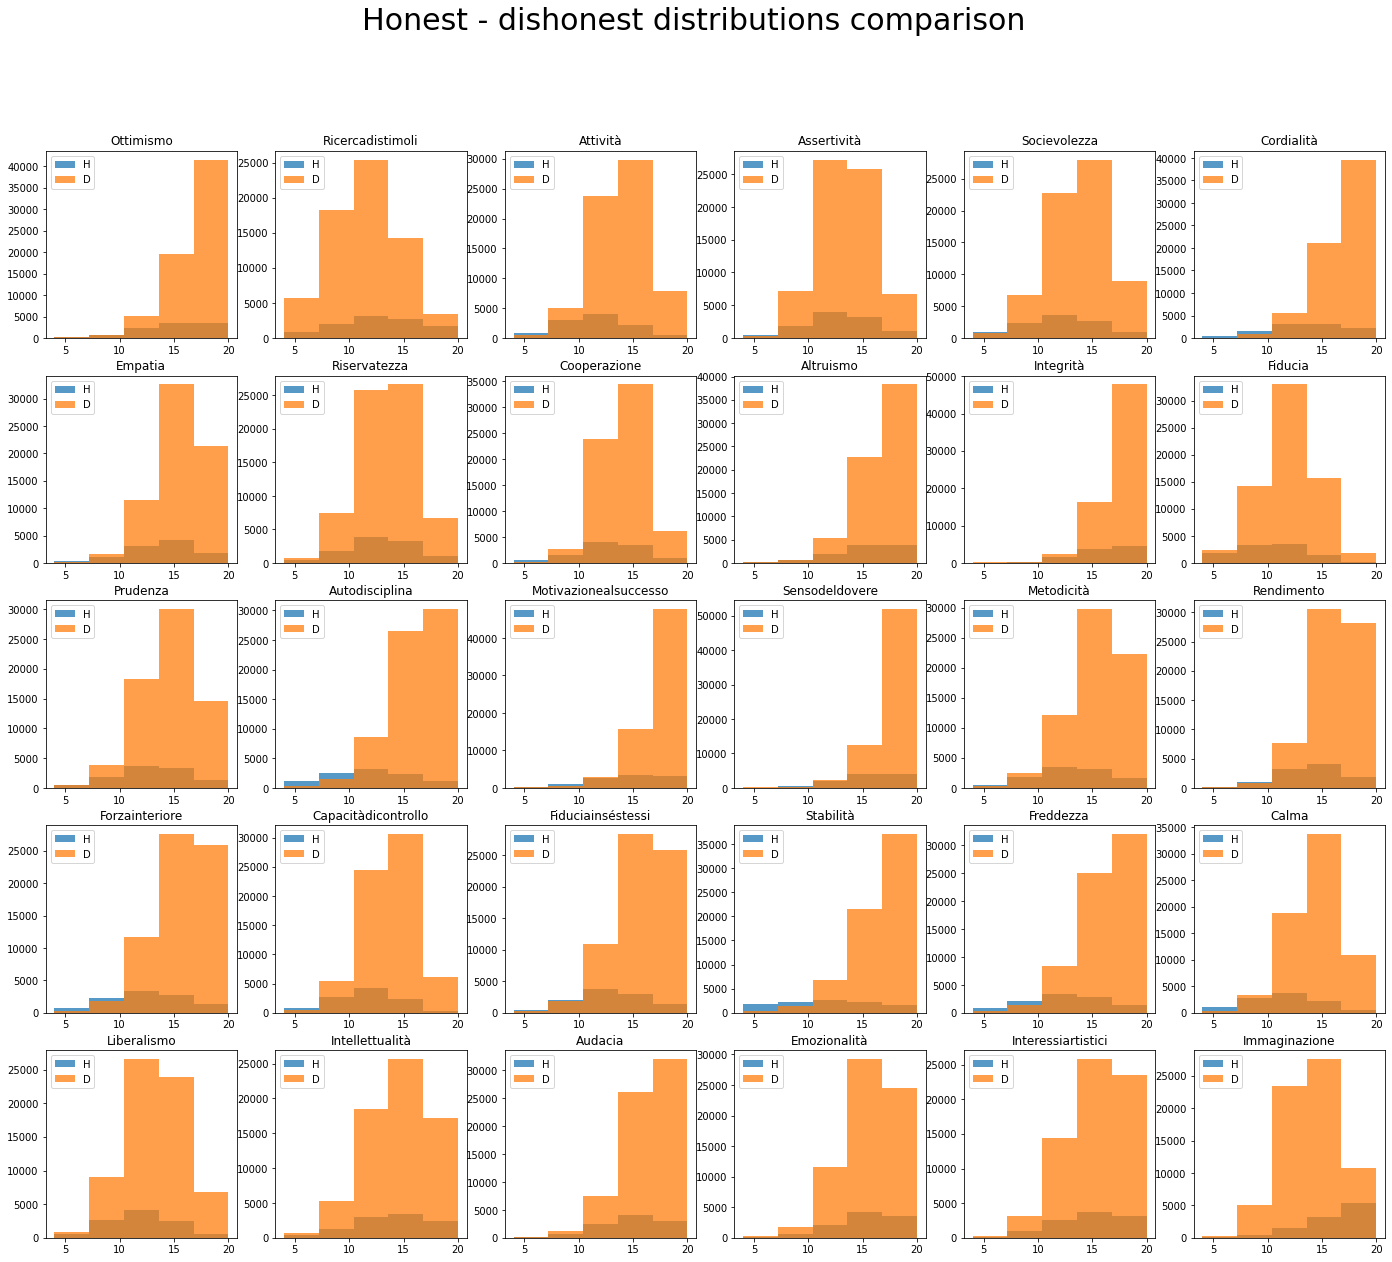

In [57]:
# Splitting the dataset into honests and dishonests

ds_H = dataset[dataset.CONDITION == 'H'].drop('CONDITION', axis = 1)
ds_D = dataset[dataset.CONDITION == 'D'].drop('CONDITION', axis = 1)

# Some histograms to compare the distributions betweeen honests and dishonests results

def split_f(rows):

  if rows <= 0:
    return None

  r_fl = int(rows**0.5)
  divs = [div for div in range(1, rows + 1) if not rows % div]
  divs_dist = sorted([abs(r_fl - div) for div in divs])

  return r_fl - divs_dist[0]

features = ds_H.shape[1]
rows = split_f(features)
cols = features // rows

if rows == 1:
  fig, axs = plt.subplots(rows, cols, figsize = (cols * 4, rows * 4))

  for ind, col in enumerate(ds_H.columns):
    axs[ind].hist(ds_H[col], bins = 5, alpha = 0.75)
    axs[ind].hist(ds_D[col], bins = 5, alpha = 0.75)
    axs[ind].set_title(col)

  fig.suptitle('Honest - dishonest distributions comparison', fontsize = 30)
  plt.show()

else:
  fig, axs = plt.subplots(rows, cols, figsize = (cols * 4, rows * 4))

  for ind, col in enumerate(ds_H.columns):
      x = ind // cols
      y = ind % cols

      axs[x, y].hist(ds_H[col], bins = 5, alpha = 0.75)
      axs[x, y].hist(ds_D[col], bins = 5, alpha = 0.75)
      axs[x, y].set_title(col)
      axs[x, y].legend(('H', 'D'), loc = 'upper left')

  fig.suptitle('Honest - dishonest distributions comparison', fontsize = 30)
  plt.show()

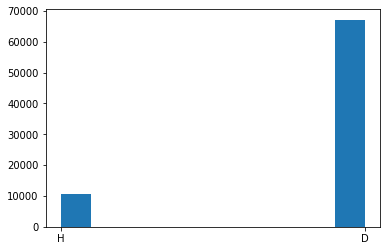

10513
67174
0.1565040045255605


In [60]:
plt.hist(dataset['CONDITION'])
plt.show()

count1 = (dataset['CONDITION'].values == 'H').sum()
count2 = (dataset['CONDITION'].values == 'D').sum()
print(count1)
print(count2)
print(count1/count2)

### Main findings 
After the EDA, no dataset showed any peculiarities or content that could have affected subsequent analyses. The only particular situation we found was in the dataset '10.R_NEO_PI', which was very unbalanced in the data: the numerosity of the Dishonest class (67174) is much higher than the Honest class (10513).
We therefore decided to apply a preliminary balancing action on the dataset so that we could then proceed with the analysis without further problems.

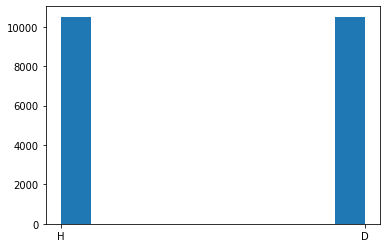

10513
10513
1.0


In [62]:
dataset10cut = datasets['10.R_NEO_PI'].sort_values('CONDITION',ascending=False).iloc[:10513*2]
plt.hist(dataset10cut['CONDITION'])
plt.show()

count1 = (dataset10cut['CONDITION'].values == 'H').sum()
count2 = (dataset10cut['CONDITION'].values == 'D').sum()
print(count1)
print(count2)
print(count1/count2)

In [64]:
pklPathCut = '../dataset/datasets_cutds10.pkl'
datasets['10.R_NEO_PI'] = dataset10cut
with open(pklPathCut, 'wb') as pklFile:
    pickle.dump(datasets,pklFile)

## Features selection

Different dataset have different variables, and so we had to perform our analysis on all of them. \
Various approaches were used for the selection of characteristics, divided into:
1. **Model Independent** = methods which don't exploit any machine learning model, but perform feature selection based just on characteristics of the variables.
2. **Model Dependent** = methods which rely on machine learning models and in some  cases, which work just with a specific type of model.

Each method has different characteristics and can lead to different results, which were subsequently evaluated. \
As a reference for the different methods we used *Kuhn, M., & Johnson, K. (2019). Feature engineering and selection: A practical approach for predictive models. CRC Press*. \
The algorithms for the different models are shown below.


### Importing libraries
All the imported libraries are needed in the subsequent analysis

In [ ]:
##### Dataset import ####

import pickle
import csv
import os

#### EDA ####

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns

#### Data Preparation ####

from sklearn.preprocessing import MinMaxScaler, StandardScaler # Useful??
from sklearn.decomposition import PCA

#### Feature selection ####

# General
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import f1_score

# Mutual information
from sklearn.feature_selection import mutual_info_classif # Model
from sklearn.feature_selection import SelectPercentile # for choosing features

# Permutation feature importance
from feature_engine.selection import SelectByShuffling

# Factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo # Kaiser-Meyer-Olkin (KMO) Test (suitability for factor analysis)

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
import pickle

In [ ]:
def update_pkl(new_version, path):
    try:
        with open(path, 'rb') as rf:
            dic = pickle.load(rf)
    except (OSError, IOError) as e:
        dic = {}
    
    dic.update(new_version)
    
    with open(path, 'wb') as wf:
            pickle.dump(dic, wf)

In [ ]:
def read_pkl(path):
    try:
        with open(path, 'rb') as rf:
            dic = pickle.load(rf)
        return dic
    except (OSError, IOError) as e:
        return None

### Container Model class definition
Here we define the Model class, which represents an important step of our feature selection. It is used to evaluate our machine learning model's performance at different stages of the feature selection process.

In [ ]:
class Model:
    def __init__(self, model):
        self.model  = model
        
        self.test_score = list()
        self.num_feats = list()
        
        self.results = None

    def model_test(self, X_train, X_test, y_train, y_test):
        '''This function fits the given model on the training data and evaluate it using the F1 score'''
        self.model.fit(X_train, y_train)
        
        test = f1_score(y_test, (self.model.predict(X_test)), average = 'macro') # F1 score calculation
        feats = X_train.shape[1]
        
        # Append the test score and number of features to the list built above
        self.test_score.append(test)
        self.num_feats.append(feats)
    
    def res_table(self):
        '''This function creates a summary table of the performance of the model'''
        nf = self.num_feats
        ts = self.test_score

        steps = ('Starting number',
                'After naive scanning',
                'After information gain',
                'After feature permutation')
        triplet = zip(steps, nf, ts)
        columns = ('step', 'feat_num', 'score')

        self.results = pd.DataFrame([(pair[0], pair[1], round(pair[2], 4)) for pair in triplet], columns = columns)
    
    def score_plot(self):
        '''This function plots the F1 scores of the model'''
        plt.plot(self.test_score)
        plt.title('Score varaition across the pipeline')
        plt.ylim(min(min(self.test_score)*0.9, 0.75), 1.0)
        plt.show()

In [ ]:
def model_pipe(X_train, X_test, y_train, y_test, model):
    '''This function show how the model changes after applying information gain'''
    # Preliminary part: run the model on the training and testing data before applying information gain
    
    pipe_an = Model(model)
    pipe_an.model_test(X_train, X_test, y_train, y_test)
    pipe_an.res_table()
    
    return {'across_tester' : pipe_an}

### Model independent

#### Factor Analysis
Factor analysis is a statistical method used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called factors. The analysis searches for such joint variations in response to unobserved latent variables. \
The information gained about the interdependencies between observed variables can be used later to reduce the set of variables in a dataset.

In [67]:
class FactorAnalysis:
    def __init__(self, dataset, suit_thr = 0.6, thr = 0.85, num_fact = 1, rotation = 'varimax'):
        self.dataset = dataset.drop('CONDITION', axis = 1)
        self.suit_thr = suit_thr
        self.thr = thr
        self.num_fact = num_fact
        self.rotation = rotation
        
        self.cols = dataset.drop('CONDITION', axis = 1).columns

        self.fa = None
        self.loadings = None
        self.to_keep = None
        self.to_remove = None
        self.kmo_model = None
        self.kmo_all = None
    
    def suitabiliy(self):
        # Suitability test
        thr = self.suit_thr
        self.kmo_all, self.kmo_model = calculate_kmo(self.dataset)

        if self.kmo_model >= 0.6: # Most used threshold
            return True
        else:
            return False

    def fact_analysis(self):
        # Dataset preparation
        dataset_sc = self.dataset
        scaler = StandardScaler()
        dataset_sc = scaler.fit_transform(dataset_sc)
        dataset_sc = pd.DataFrame(dataset_sc, columns = self.cols)        
        
        # Perform factor analysis
        self.fa = FactorAnalyzer()
        self.fa.set_params(n_factors = self.num_fact, rotation = self.rotation)
        self.fa.fit(dataset_sc)
    
    def loadings_comp(self):
        # Loading factors calculation
        self.loadings = pd.DataFrame(self.fa.loadings_,
             index = self.cols,
             columns = ['factor_' + str(fact + 1) for fact in range(self.num_fact)])

        self.loadings.sort_values('factor_1', ascending = False, inplace = True)
        
    def calc_feats(self):
        num_to_keep = round(len(self.cols) * self.thr)
        self.to_keep = list(self.loadings.index[:num_to_keep])
        self.to_remove = list(self.loadings.index[num_to_keep:])

    def fact_an_plot_rank(self):
        self.loadings.plot.bar(figsize = (20, 5))
        plt.ylabel('Factor analysis ranks')
        plt.show()

In [75]:
def fact_an_pipe(dataset, model, suit_thr = 0.6, thr = 0.85, num_fact = 1, rotation = 'varimax', verbose = False):
    #Preliminary

    X_train, X_test, y_train, y_test = ds_split(dataset, target = 'CONDITION')
    pipe_an = Model(model)
    pipe_an.model_test(X_train, X_test, y_train, y_test) ####
    
    fp = FactorAnalysis(dataset, suit_thr = suit_thr, thr = thr, num_fact = num_fact, rotation = rotation)
    if not fp.suitabiliy():
        print("Suitabiliy: {} (model is not suitable)".format(round(fp.kmo_model, 4)))
        return None
    print("Suitabiliy: {} (model is suitable)".format(round(fp.kmo_model, 4)))
    fp.fact_analysis()
    fp.loadings_comp()
    fp.calc_feats()

    dataset_new  = dataset[fp.to_keep + ['CONDITION']]
    X_train, X_test, y_train, y_test = ds_split(dataset_new, target = 'CONDITION')
    pipe_an.model_test(X_train, X_test, y_train, y_test) ####
    pipe_an.res_table()
    if verbose: print('Factor analysis done')
    
    return {'across_tester' : pipe_an, 'inf_gain' : fp}

In [3]:
pklPath = '../dataset/datasets_cutds10.pkl'

with open(pklPath, 'rb') as pklFile:
    datasets = pickle.load(pklFile)

In [4]:
method_results_path = '../results/fac_an_res.pkl'

In [5]:
method_results_dict = read_pkl(method_results_path)
if(method_results_dict == None): method_results_dict = {}

In [6]:
update_pkl(method_results_dict, method_results_path)

In [7]:
def run_fac_an_and_save_results(perc=0.2, performance_df_name='performance'):
    performance_df = pd.DataFrame(columns = ['log_reg', 'dts', 'rfc', 'gbc', 'knn', 'svm'])
    importance_dict = {}

    for ds_name in list(datasets.keys()):
        print(ds_name)
        dataset = datasets[ds_name]

        # Copying and scaling the original dataset
        ds_for_scaling = dataset.drop('CONDITION', axis = 1)
        scaler = MinMaxScaler()
        ds_scaled = scaler.fit_transform(ds_for_scaling)
        ds_scaled = pd.DataFrame(ds_scaled, columns = ds_for_scaling.columns)
        ds_scaled['CONDITION'] = dataset.CONDITION

        models = {
            'log_reg' : LogisticRegression(random_state = 16),
            'dts' : DecisionTreeClassifier(random_state = 16),
            'rfc' : RandomForestClassifier(random_state = 16),
            'gbc' : GradientBoostingClassifier(random_state = 16),
            'knn' : KNeighborsClassifier(),
            'svm' : SVC(random_state = 16)
                }

        results = dict()

        for model in models.keys():
            print(model)

            if model in ('knn', 'svm'):
                pl = fact_an_pipe(dataset, models[model], thr = perc)
            else:
                pl = fact_an_pipe(ds_scaled, models[model], thr = perc)

            results[model] = pl


        # Obtain the importances assigned to features
        importances = pl['inf_gain'].loadings[['factor_1']]
        importance_dict[ds_name] = importances


        # Obtain the performance after feature removal
        perfs = []
        for model_name in results.keys():
            perfs.append(results[model_name]['across_tester'].test_score[-1])
        performance_df.loc[ds_name] = perfs
        display(performance_df)

    method_results_dict['importances'] = importance_dict
    method_results_dict[performance_df_name] = performance_df

In [ ]:
run_fac_an_and_save_results(0.8, 'performance_80perc')
update_pkl(method_results_dict, method_results_path)

In [ ]:
run_fac_an_and_save_results(0.6, 'performance_60perc')
update_pkl(method_results_dict, method_results_path)

In [ ]:
run_fac_an_and_save_results(0.4, 'performance_40perc')
update_pkl(method_results_dict, method_results_path)

In [ ]:
run_fac_an_and_save_results(0.2, 'performance_20perc')
update_pkl(method_results_dict, method_results_path)

#### Information gain
In information theory and machine learning, information gain is a synonym for Kullback–Leibler divergence; the amount of information gained about a random variable or signal from observing another random variable. However, it can also be used for feature selection, by evaluating the gain of each variable in the context of the target variable. In this slightly different usage, the calculation is referred to as mutual information between two random variables. In machine learning, this concept can be used to define a preferred sequence of attributes to investigate: usually an attribute with high mutual information should be preferred to other attributes.

Here we provide the InformationGain class, which is used to choose features based on their mutual information with the target variable.

In [ ]:
class InformationGain:
    def __init__(self, X_train, X_test, y_train, y_test, thr = 85):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.thr = thr

        self.mi = None
        self.m_sel_ = None
        self.to_remove = None

    def inf_gain(self):
        '''This function alculates the mutual information between the features and the target variable'''
        self.mi = mutual_info_classif(self.X_train, self.y_train)
        self.mi = pd.Series(self.mi)
        self.mi.index = self.X_train.columns
        self.mi = self.mi.sort_values(ascending = False)

        # Select features (i.e., top "thr" percentile of features based on mutual information)
        self.m_sel_ = SelectPercentile(mutual_info_classif, percentile = self.thr).fit(self.X_train, self.y_train)
        
        # Features to remove
        self.to_remove = list(set(self.X_train.columns) - set(self.X_train.columns[self.m_sel_.get_support()]))

        # Transformation
        X_train_arr = self.m_sel_.transform(self.X_train)
        X_test_arr = self.m_sel_.transform(self.X_test)

        # Dataframe structure restoring
        self.X_train = pd.DataFrame(X_train_arr, columns = self.X_train.columns[self.m_sel_.get_support()])
        self.X_test = pd.DataFrame(X_test_arr, columns = self.X_test.columns[self.m_sel_.get_support()])

        self.y_train.reset_index(drop = True, inplace = True)
        self.y_test.reset_index(drop = True, inplace = True)
    
    def ig_plot_rank(self):
        '''This function plot the mutual information scores of all features'''
        self.mi.plot.bar(figsize = (20, 5))
        plt.ylabel('Mutual Information ranks')
        plt.show()

In [ ]:
def inf_gain_pipe(X_train, X_test, y_train, y_test, model, verbose = False, thr = 85):
    '''This function show how the model changes after applying information gain'''
    # Preliminary part: run the model on the training and testing data before applying information gain
    
    print('X_train.shape ', X_train.shape)
    print('X_test.shape ', X_test.shape)
    print('y_train.shape ', y_train.shape)
    print('y_train.shape ', y_train.shape)
    pipe_an = Model(model)
    pipe_an.model_test(X_train, X_test, y_train, y_test)

    # Perform information gain

    ig = InformationGain(X_train, X_test, y_train, y_test, thr = thr)
    ig.inf_gain()
    print('ig.X_train.shape ', ig.X_train.shape)
    print('ig.X_test.shape ', ig.X_test.shape)
    print('ig.y_train.shape ', ig.y_train.shape)
    print('ig.y_train.shape ', ig.y_train.shape)

    # Final part: run again the model on the training and testing data after applying information gain
    pipe_an.model_test(ig.X_train, ig.X_test, ig.y_train, ig.y_test) # Run the model on previously the modified data
    pipe_an.res_table()
    if verbose: print('Information gain done')
    
    return {'across_tester' : pipe_an, 'inf_gain' : ig}

In [3]:
pklPath = '../dataset/datasets_cutds10.pkl'

with open(pklPath, 'rb') as pklFile:
    datasets = pickle.load(pklFile)

In [4]:
method_results_path = '../results/inf_gain_res.pkl'

In [5]:
method_results_dict = read_pkl(method_results_path)
if(method_results_dict == None): method_results_dict = {}

In [6]:
update_pkl(method_results_dict, method_results_path)

In [7]:
def run_inf_gain_and_save_results(perc=20, performance_df_name='performance'):
    performance_df = pd.DataFrame(columns = ['log_reg', 'dts', 'rfc', 'gbc', 'knn', 'svm'])
    importance_dict = {}

    for ds_name in list(datasets.keys()):
        print(ds_name)
        dataset = datasets[ds_name]

        # Copying and scaling the original dataset
        ds_for_scaling = dataset.drop('CONDITION', axis = 1)
        scaler = MinMaxScaler()
        ds_scaled = scaler.fit_transform(ds_for_scaling)
        ds_scaled = pd.DataFrame(ds_scaled, columns = ds_for_scaling.columns)
        ds_scaled['CONDITION'] = dataset.CONDITION

        # Training and test sets separation
        X_train, X_test, y_train, y_test = ds_split(dataset, target = 'CONDITION') # Regular
        X_train_s, X_test_s, y_train_s, y_test_s = ds_split(ds_scaled, target = 'CONDITION') # Scaled

        models = {
            'log_reg' : LogisticRegression(random_state = 16),
            'dts' : DecisionTreeClassifier(random_state = 16),
            'rfc' : RandomForestClassifier(random_state = 16),
            'gbc' : GradientBoostingClassifier(random_state = 16),
            'knn' : KNeighborsClassifier(),
            'svm' : SVC(random_state = 16)
                }

        results = dict()

        for model in models.keys():
            print(model)

            if model in ('knn', 'svm'):
                pl = inf_gain_pipe(X_train_s, X_test_s, y_train_s, y_test_s, models[model], thr=perc)
            else:
                pl = inf_gain_pipe(X_train, X_test, y_train, y_test, models[model], thr=perc)

            results[model] = pl


        # Obtain the importances assigned to features
        importances = pd.DataFrame({'importance': pl['inf_gain'].mi})
        importance_dict[ds_name] = importances

        # Obtain the performance after feature removal
        perfs = []
        for model_name in results.keys():
            print(results[model_name]['across_tester'].test_score)
            perfs.append(results[model_name]['across_tester'].test_score[-1])
        performance_df.loc[ds_name] = perfs

    method_results_dict['importances'] = importance_dict
    method_results_dict[performance_df_name] = performance_df

In [ ]:
run_inf_gain_and_save_results(80, 'performance_80perc')
update_pkl(method_results_dict, method_results_path)

In [ ]:
run_inf_gain_and_save_results(60, 'performance_60perc')
update_pkl(method_results_dict, method_results_path)

In [ ]:
run_inf_gain_and_save_results(40, 'performance_40perc')
update_pkl(method_results_dict, method_results_path)

In [ ]:
run_inf_gain_and_save_results(20, 'performance_20perc')
update_pkl(method_results_dict, method_results_path)

### Model dependent

#### Feature permutation importance
The feature permutation importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.
With the permutation importance feature selection method, the performance of a model is tested after removing each individual feature and replacing that feature with random noise. In this way the importance of individual features can be directly compared, and a quantitative threshold can be used to determine feature inclusion.

Here we implemented the Python class FeaturePermutation, which is used for feature selection using feature permutation and which takes several parameters. This class employs the SelectByShuffling feature selection model, which is an implementation of feature permutation provided by the feature-engine module. The function shuffles the values of each feature independently and evaluates the performance drop, allowing us to evaluate the importance of each feature based on the performance reduction when it's shuffled. The final feature selection is based on the initializer threshold, which determines the greatest performance reduction allowed for feature selection.

We have classified this technique as model dependent for simplicity, although it is usually assigned to the hybrid class.

In [1]:
class FeaturePermutation:
    def __init__(self, model, X_train, X_test, y_train, y_test, variables = None, score = 'f1_macro', thr = 0, perc = None, cv_val = 3, rand = 16):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

        self.variables = variables
        self.model = model
        self.score = score
        self.thr = thr
        self.perc = perc
        self.cv = cv_val
        self.rand = rand
        
        self.all_feats_score = None
        self.to_remove = None
        self.drift = None
        self.sel = None

    def feat_perm(self):
        self.sel = SelectByShuffling(
            variables = self.variables, # Set to None to take into account all variables
            estimator = self.model,
            scoring = self.score,
            threshold = self.thr, # maximum performance drop allowed for selection
            cv = self.cv,
            random_state = self.rand
        )

        self.sel.fit(self.X_train, self.y_train)
        self.to_remove = self.sel.features_to_drop_
        self.all_feats_score = self.sel.initial_model_performance_
        self.drift = self.sel.performance_drifts_.items()
        
        # If perc==None select by threshold,
        # else select by top percentile
        if(self.perc==None):
            # Transform the data by removing unnecessary features
            self.X_train = self.sel.transform(self.X_train)
            self.X_test = self.sel.transform(self.X_test)
        else:
            # Convert dict items list to list of numbers
            drift_values = [d[1] for d in list(self.drift)]
        
            perc_sel = SelectPercentile(lambda x,y:(drift_values, None), percentile = self.perc).fit(self.X_train, self.y_train)
        
            # Transform the data by removing features out of the percentile
            X_train_arr = perc_sel.transform(self.X_train)
            X_test_arr = perc_sel.transform(self.X_test)
        
            # Dataframe structure restoring
            self.X_train = pd.DataFrame(X_train_arr, columns = self.X_train.columns[perc_sel.get_support()])
            self.X_test = pd.DataFrame(X_test_arr, columns = self.X_test.columns[perc_sel.get_support()])

    def fp_plot_hist(self):
        pd.Series(self.sel.performance_drifts_).hist(bins = 10, figsize = (10, 5))
        plt.title('Histogram of the performance drops')
        plt.show()
    
    def fp_plot_rank(self):
        pd.Series(self.sel.performance_drifts_).sort_values(ascending = False).plot.bar(figsize = (20, 5))
        plt.title('Sorted barplot of the performance drops')
        plt.show()

In [2]:
def feat_imp_pipe(X_train, X_test, y_train, y_test, model, score = 'f1_macro', verbose = False, thr=0, perc=None):
    # Preliminary
    
    pipe_an = Model(model)
    pipe_an.model_test(X_train, X_test, y_train, y_test) ####

    # Feature permutation importance
    
    fpi = FeaturePermutation(model, X_train, X_test, y_train, y_test, score = score, thr=thr, perc=perc)
    fpi.feat_perm()
    pipe_an.model_test(fpi.X_train, fpi.X_test, fpi.y_train, fpi.y_test) ####
    pipe_an.res_table()
    if verbose: print('Permutation importance done')
    
    return {'across_tester' : pipe_an, 'feat_perm_imp' : fpi}

In [3]:
pklPath = '../dataset/datasets_cutds10.pkl'

with open(pklPath, 'rb') as pklFile:
    datasets = pickle.load(pklFile)

In [4]:
method_results_path = '../results/perm_imp_res.pkl'

In [5]:
method_results_dict = read_pkl(method_results_path)
if(method_results_dict == None): method_results_dict = {}

In [6]:
update_pkl(method_results_dict, method_results_path)

In [7]:
def run_perm_imp_and_save_results(perc=20, performance_df_name='performance'):
    performance_df = pd.DataFrame(columns = ['log_reg', 'dts', 'rfc', 'gbc', 'knn', 'svm'])
    importance_dict = {}

    for ds_name in datasets.keys():
        print(ds_name)
        # Selecting the dataset
        dataset = datasets[ds_name]

        # Copying and scaling the original dataset
        ds_for_scaling = dataset.drop('CONDITION', axis = 1)
        scaler = MinMaxScaler()
        ds_scaled = scaler.fit_transform(ds_for_scaling)
        ds_scaled = pd.DataFrame(ds_scaled, columns = ds_for_scaling.columns)
        ds_scaled['CONDITION'] = dataset.CONDITION

        # Training and test sets separation
        X_train, X_test, y_train, y_test = ds_split(dataset, target = 'CONDITION') # Regular
        X_train_s, X_test_s, y_train_s, y_test_s = ds_split(ds_scaled, target = 'CONDITION') # Scaled

        # Making a dictionary containing the models
        models = {
        'log_reg' : LogisticRegression(random_state = 16),
            'dec_trees' : DecisionTreeClassifier(random_state = 16),
            'rand_forest' : RandomForestClassifier(random_state = 16),
            'gradient_boost' : GradientBoostingClassifier(random_state = 16),
            'KNN' : KNeighborsClassifier(),
            'SVM' : SVC(random_state = 16)
                }

        # Performing feature permutation importante for each model

        results = dict()

        for model in models.keys():
            print('\t' + model)

            if model in ('knn', 'svm'):
                pl = feat_imp_pipe(X_train_s, X_test_s, y_train_s, y_test_s, models[model], thr=0, perc=perc)
            else:
                pl = feat_imp_pipe(X_train, X_test, y_train, y_test, models[model], thr=0, perc=perc)

            results[model] = pl


        # Obtain feature importances for all models
        table = pd.DataFrame()
        for key in results.keys():
            table[key] = pd.DataFrame(results[key]['feat_perm_imp'].drift, columns =('feature', 'drift')).sort_values('feature').drift
        table.index = X_train.columns.sort_values()
        scaler = MinMaxScaler()
        table_scaled = scaler.fit_transform(table)
        table_scaled = pd.DataFrame(table_scaled)
        table_scaled.columns = results.keys()
        table_scaled.index = X_train.columns.sort_values()
        importance_dict[ds_name] = table_scaled
        # display(table_scaled)


        # Obtain the performance after feature removal
        perfs = []
        for model_name in results.keys():
            perfs.append(results[model_name]['across_tester'].test_score[-1])
        performance_df.loc[ds_name] = perfs
        # display(performance_df)
        
    method_results_dict['importances'] = importance_dict
    method_results_dict[performance_df_name] = performance_df

In [8]:
run_perm_imp_and_save_results(80, 'performance_80perc')
update_pkl(method_results_dict, method_results_path)

1.shortDT_DT_df_JI
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
1.shortDT_DT_df_CC
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
2.PRMQ_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
3.PCL5_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
4.NAQ_R_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
5.PHQ9_GAD7_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
6.PID5_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
7.sPID-5_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
8.PRFQ_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
9.IESR_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
10.R_NEO_PI
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
11.RAW_DDDT
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
12.IADQ_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
13.BF_df_CTU
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM


In [9]:
run_perm_imp_and_save_results(60, 'performance_60perc')
update_pkl(method_results_dict, method_results_path)

1.shortDT_DT_df_JI
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
1.shortDT_DT_df_CC
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
2.PRMQ_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
3.PCL5_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
4.NAQ_R_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
5.PHQ9_GAD7_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
6.PID5_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
7.sPID-5_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
8.PRFQ_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
9.IESR_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
10.R_NEO_PI
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
11.RAW_DDDT
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
12.IADQ_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
13.BF_df_CTU
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM


In [10]:
run_perm_imp_and_save_results(40, 'performance_40perc')
update_pkl(method_results_dict, method_results_path)

1.shortDT_DT_df_JI
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
1.shortDT_DT_df_CC
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
2.PRMQ_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
3.PCL5_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
4.NAQ_R_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
5.PHQ9_GAD7_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
6.PID5_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
7.sPID-5_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
8.PRFQ_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
9.IESR_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
10.R_NEO_PI
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
11.RAW_DDDT
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
12.IADQ_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
13.BF_df_CTU
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM


In [11]:
run_perm_imp_and_save_results(20, 'performance_20perc')
update_pkl(method_results_dict, method_results_path)

1.shortDT_DT_df_JI
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
1.shortDT_DT_df_CC
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
2.PRMQ_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
3.PCL5_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
4.NAQ_R_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
5.PHQ9_GAD7_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
6.PID5_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
7.sPID-5_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
8.PRFQ_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
9.IESR_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
10.R_NEO_PI
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
11.RAW_DDDT
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
12.IADQ_df
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
13.BF_df_CTU
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM


### Pipeline
An additional approach we wanted to test was applying two different feature selection techniques in sequence. Here we apply first a selection based on information gain and then, on the remaining variables, we apply permutation importance. The result consists  in a list of importance values; the values that were removed in the second step are assigned importance 0, the others are assigned the importance resulting from the feature permutation step.


In [ ]:
def pipeline(X_train, X_test, y_train, y_test, model, score = 'f1_macro', verbose = False, thr=0, perc=None):
    '''This function performs the pipeline in which information gain and permutation important work in series'''
    # Preliminary
    pipe_an = Model(model)

    pipe_an.model_test(X_train, X_test, y_train, y_test)

    # Information gain

    ig = InformationGain(X_train, X_test, y_train, y_test)
    ig.inf_gain()
    pipe_an.model_test(ig.X_train, ig.X_test, ig.y_train, ig.y_test)
    if verbose: print('Information gain done')
    
    # Feature permutation importance
    
    fpi = FeaturePermutation(model, ig.X_train, ig.X_test, ig.y_train, ig.y_test, score = score, thr=thr, perc=perc)
    fpi.feat_perm()
    pipe_an.model_test(fpi.X_train, fpi.X_test, fpi.y_train, fpi.y_test)
    pipe_an.res_table()
    if verbose: print('Permutation importance done')
    
    return {'across_tester' : pipe_an, 'inf_gain' : ig, 'feat_perm_imp' : fpi}

In [3]:
pklPath = '../dataset/datasets_cutds10.pkl'

with open(pklPath, 'rb') as pklFile:
    datasets = pickle.load(pklFile)

In [4]:
method_results_path = '../results/pipeline_res.pkl'

In [5]:
method_results_dict = read_pkl(method_results_path)
if(method_results_dict == None): method_results_dict = {}

In [6]:
update_pkl(method_results_dict, method_results_path)

In [7]:
def run_pipeline_and_save_results(perc=20, performance_df_name='performance'):
    performance_df = pd.DataFrame(columns = ['log_reg', 'dts', 'rfc', 'gbc', 'knn', 'svm'])
    importance_dict = {}

    for ds_name in datasets.keys():
        print(ds_name)
        # Selecting the dataset
        dataset = datasets[ds_name]
        print('dataset.shape: ', dataset.shape)

        # Copying and scaling the original dataset
        ds_for_scaling = dataset.drop('CONDITION', axis = 1)
        scaler = MinMaxScaler()
        ds_scaled = scaler.fit_transform(ds_for_scaling)
        ds_scaled = pd.DataFrame(ds_scaled, columns = ds_for_scaling.columns)
        ds_scaled['CONDITION'] = dataset.CONDITION

        # Training and test sets separation
        X_train, X_test, y_train, y_test = ds_split(dataset, target = 'CONDITION') # Regular
        X_train_s, X_test_s, y_train_s, y_test_s = ds_split(ds_scaled, target = 'CONDITION') # Scaled

        # Making a dictionary containing the models
        models = {
            'log_reg' : LogisticRegression(random_state = 16),
            'dec_trees' : DecisionTreeClassifier(random_state = 16),
            'rand_forest' : RandomForestClassifier(random_state = 16),
            'gradient_boost' : GradientBoostingClassifier(random_state = 16),
            'KNN' : KNeighborsClassifier(),
            'SVM' : SVC(random_state = 16)
                }

        # Perfofming pipeline for each model

        results = dict()

        for model in models.keys():
            print('\t' + model)

            if model in ('knn', 'svm'):
                pl = pipeline(X_train_s, X_test_s, y_train_s, y_test_s, models[model], thr=0, perc=perc)
            else:
                pl = pipeline(X_train, X_test, y_train, y_test, models[model], thr=0, perc=perc)

            results[model] = pl

        # Obtain feature importances for all models
        table = pd.DataFrame()
        base_dict = {feat:0.0 for feat in list(set(dataset.columns) - set({'CONDITION'}))}
        for key in results.keys():
            table[key] = pd.DataFrame(dict(base_dict, **{item[0]:item[1] for item in results[key]['feat_perm_imp'].drift}).items(), columns =('feature', 'drift')).sort_values('feature').drift
        table.index = X_train.columns.sort_values()

        scaler = MinMaxScaler()
        table_scaled = scaler.fit_transform(table)

        table_scaled = pd.DataFrame(table_scaled)
        table_scaled.columns = results.keys()
        table_scaled.index = X_train.columns.sort_values()
        importance_dict[ds_name] = table_scaled
        # display(table_scaled)


        # Obtain the performance after feature removal
        perfs = []
        for model_name in results.keys():
            perfs.append(results[model_name]['across_tester'].test_score[-1])
        performance_df.loc[ds_name] = perfs
        # display(performance_df)
        
    method_results_dict['importances'] = importance_dict
    method_results_dict[performance_df_name] = performance_df

In [8]:
run_pipeline_and_save_results(80, 'performance_80perc')
update_pkl(method_results_dict, method_results_path)

1.shortDT_DT_df_JI
dataset.shape:  (864, 28)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
1.shortDT_DT_df_CC
dataset.shape:  (482, 28)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
2.PRMQ_df
dataset.shape:  (1404, 17)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
3.PCL5_df
dataset.shape:  (402, 21)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
4.NAQ_R_df
dataset.shape:  (712, 23)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
5.PHQ9_GAD7_df
dataset.shape:  (1118, 17)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
6.PID5_df
dataset.shape:  (824, 221)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
7.sPID-5_df
dataset.shape:  (1038, 26)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
8.PRFQ_df
dataset.shape:  (678, 19)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
9.IESR_df
dataset.shape:  (358, 23)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
10.R_NEO_PI
dataset.

In [9]:
run_pipeline_and_save_results(60, 'performance_60perc')
update_pkl(method_results_dict, method_results_path)

1.shortDT_DT_df_JI
dataset.shape:  (864, 28)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
1.shortDT_DT_df_CC
dataset.shape:  (482, 28)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
2.PRMQ_df
dataset.shape:  (1404, 17)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
3.PCL5_df
dataset.shape:  (402, 21)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
4.NAQ_R_df
dataset.shape:  (712, 23)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
5.PHQ9_GAD7_df
dataset.shape:  (1118, 17)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
6.PID5_df
dataset.shape:  (824, 221)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
7.sPID-5_df
dataset.shape:  (1038, 26)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
8.PRFQ_df
dataset.shape:  (678, 19)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
9.IESR_df
dataset.shape:  (358, 23)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
10.R_NEO_PI
dataset.

In [10]:
run_pipeline_and_save_results(40, 'performance_40perc')
update_pkl(method_results_dict, method_results_path)

1.shortDT_DT_df_JI
dataset.shape:  (864, 28)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
1.shortDT_DT_df_CC
dataset.shape:  (482, 28)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
2.PRMQ_df
dataset.shape:  (1404, 17)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
3.PCL5_df
dataset.shape:  (402, 21)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
4.NAQ_R_df
dataset.shape:  (712, 23)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
5.PHQ9_GAD7_df
dataset.shape:  (1118, 17)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
6.PID5_df
dataset.shape:  (824, 221)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
7.sPID-5_df
dataset.shape:  (1038, 26)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
8.PRFQ_df
dataset.shape:  (678, 19)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
9.IESR_df
dataset.shape:  (358, 23)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
10.R_NEO_PI
dataset.

In [11]:
run_pipeline_and_save_results(20, 'performance_20perc')
update_pkl(method_results_dict, method_results_path)

1.shortDT_DT_df_JI
dataset.shape:  (864, 28)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
1.shortDT_DT_df_CC
dataset.shape:  (482, 28)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
2.PRMQ_df
dataset.shape:  (1404, 17)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
3.PCL5_df
dataset.shape:  (402, 21)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
4.NAQ_R_df
dataset.shape:  (712, 23)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
5.PHQ9_GAD7_df
dataset.shape:  (1118, 17)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
6.PID5_df
dataset.shape:  (824, 221)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
7.sPID-5_df
dataset.shape:  (1038, 26)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
8.PRFQ_df
dataset.shape:  (678, 19)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
9.IESR_df
dataset.shape:  (358, 23)
	log_reg
	dec_trees
	rand_forest
	gradient_boost
	KNN
	SVM
10.R_NEO_PI
dataset.

## Results

In [36]:
initial_res = read_pkl('../results/initial_res.pkl')
print('initial_res \n', initial_res.keys())
inf_gain_res = read_pkl('../results/inf_gain_res.pkl')
print('inf_gain_res \n', inf_gain_res.keys())
fac_an_res = read_pkl('../results/fac_an_res.pkl')
print('fac_an_res \n', fac_an_res.keys())
perm_imp_res = read_pkl('../results/perm_imp_res.pkl')
print('perm_imp_res \n', perm_imp_res.keys())
pipeline_res = read_pkl('../results/pipeline_res.pkl')
print('pipeline_res \n', pipeline_res.keys())

initial_res 
 dict_keys(['performance'])
inf_gain_res 
 dict_keys(['importances', 'performance_80perc', 'performance_60perc', 'performance_40perc', 'performance_20perc'])
fac_an_res 
 dict_keys(['importances', 'performance_80perc', 'performance_60perc', 'performance_40perc', 'performance_20perc'])
perm_imp_res 
 dict_keys(['importances', 'performance_80perc', 'performance_60perc', 'performance_40perc', 'performance_20perc'])
pipeline_res 
 dict_keys(['importances', 'performance_80perc', 'performance_40perc', 'performance_20perc', 'performance_60perc'])


### Performance drop as percentage of selected features decreases
In this section we show, using line plots, the decrease in the test score (f1 score) of the 6 models used when selecting different percentages of features. On the x axis you can find percentages of selected features, while on the y axis you find the score.

In [37]:
def display_performance_drop(performance_dfs, dataset_name, ax=None, names = ['100','80','60','40','20']):
    assert (len(performance_dfs) == len(names))
    full_arr = np.stack(performance_dfs)
    ds_ind = np.where(performance_dfs[0].index.values == dataset_name)
    ds_arr = np.squeeze(full_arr[:,ds_ind,:])
    df = pd.DataFrame(ds_arr, columns=performance_dfs[0].columns.values, index=names)
    # display(df)
    
    if(ax==None):
        for model in df.columns.values:
            plt.plot(np.arange(len(names)), df[model], label=model)
        plt.xticks(np.arange(len(names)), names)
        plt.legend()
        plt.show()
    else:
        for model in df.columns.values:
            ax.plot(np.arange(len(names)), df[model], label=model)
        ax.set_xticks(np.arange(len(names)), names)
        ax.legend(loc='lower right')
        ax.set_title(dataset_name)
        ax.set_ylim([0.4,1])

#### Information gain

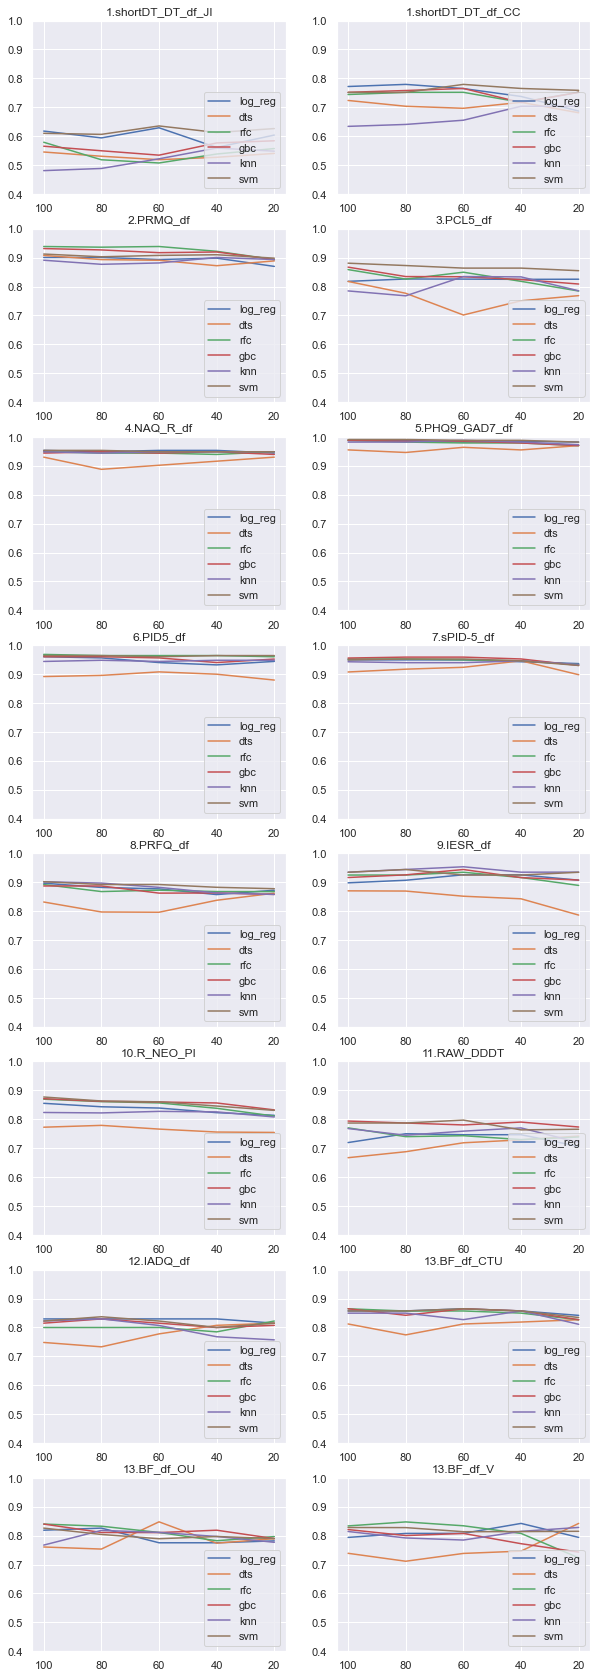

In [63]:
fig, axs = plt.subplots(8,2, figsize=(10, 30))
all_axs = []
for row in axs:
    all_axs.extend(row)
for i, ax in enumerate(all_axs):
    # print(initial_res['performance'].index.values[i])
    display_performance_drop([
        initial_res['performance'],
        inf_gain_res['performance_80perc'],
        inf_gain_res['performance_60perc'],
        inf_gain_res['performance_40perc'],
        inf_gain_res['performance_20perc']], initial_res['performance'].index.values[i], ax)
    
# plt.savefig('../results/inf_gain_performance_drop.png')

#### Factor analysis

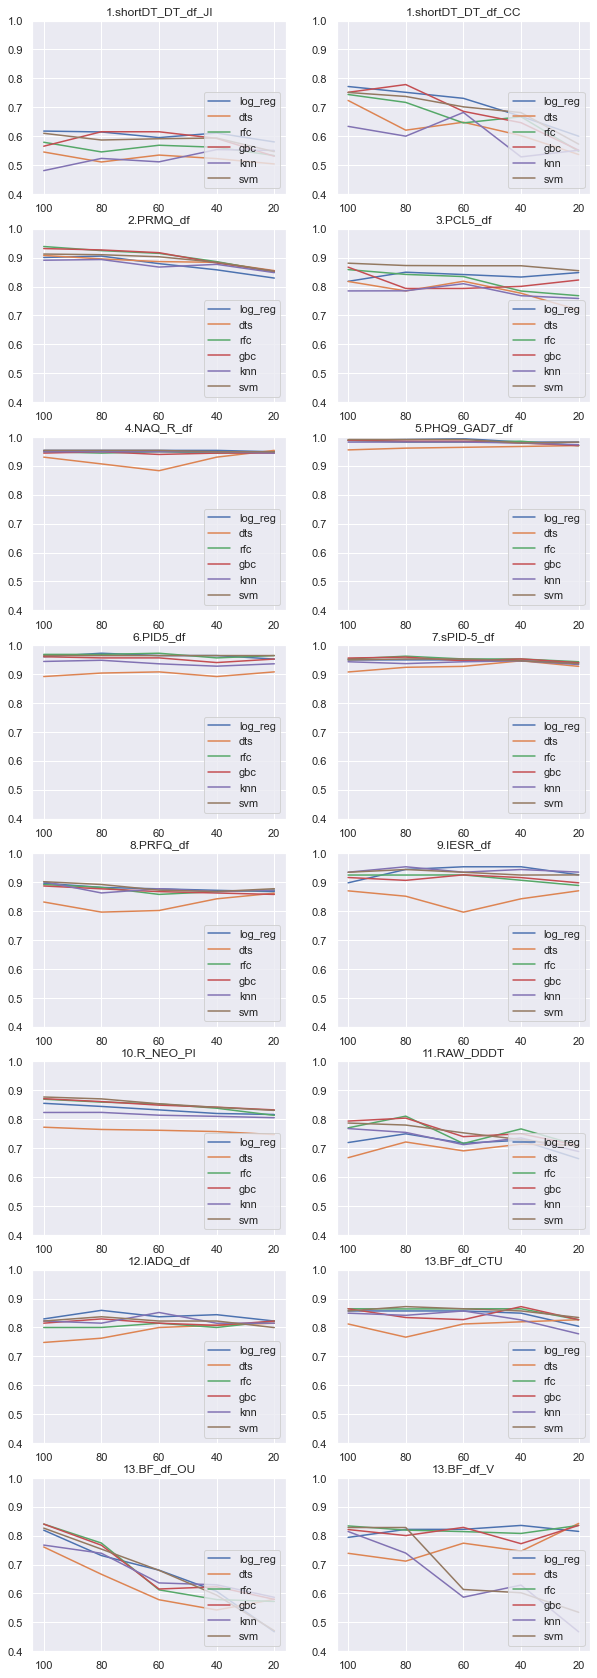

In [62]:
fig, axs = plt.subplots(8,2, figsize=(10, 30))
all_axs = []
for row in axs:
    all_axs.extend(row)
for i, ax in enumerate(all_axs):
    # print(initial_res['performance'].index.values[i])
    display_performance_drop([
        initial_res['performance'],
        fac_an_res['performance_80perc'],
        fac_an_res['performance_60perc'],
        fac_an_res['performance_40perc'],
        fac_an_res['performance_20perc']], initial_res['performance'].index.values[i], ax)
    
# plt.savefig('../results/fac_an_performance_drop.png')

#### Feature permutation importance

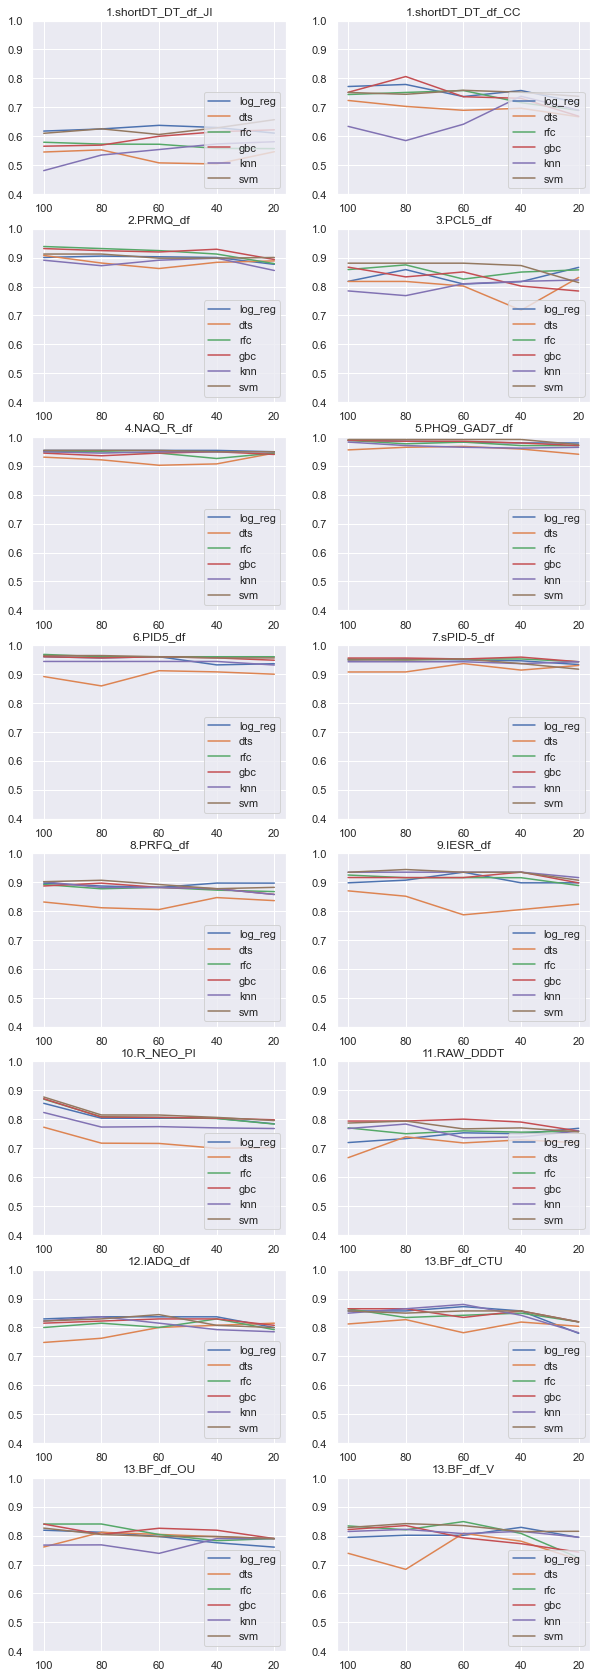

In [61]:
fig, axs = plt.subplots(8,2, figsize=(10, 30))
all_axs = []
for row in axs:
    all_axs.extend(row)
for i, ax in enumerate(all_axs):
    display_performance_drop([
        initial_res['performance'],
        perm_imp_res['performance_80perc'],
        perm_imp_res['performance_60perc'],
        perm_imp_res['performance_40perc'],
        perm_imp_res['performance_20perc']], initial_res['performance'].index.values[i], ax)
    
# plt.savefig('../results/feat_perm_performance_drop.png')

#### Pipeline

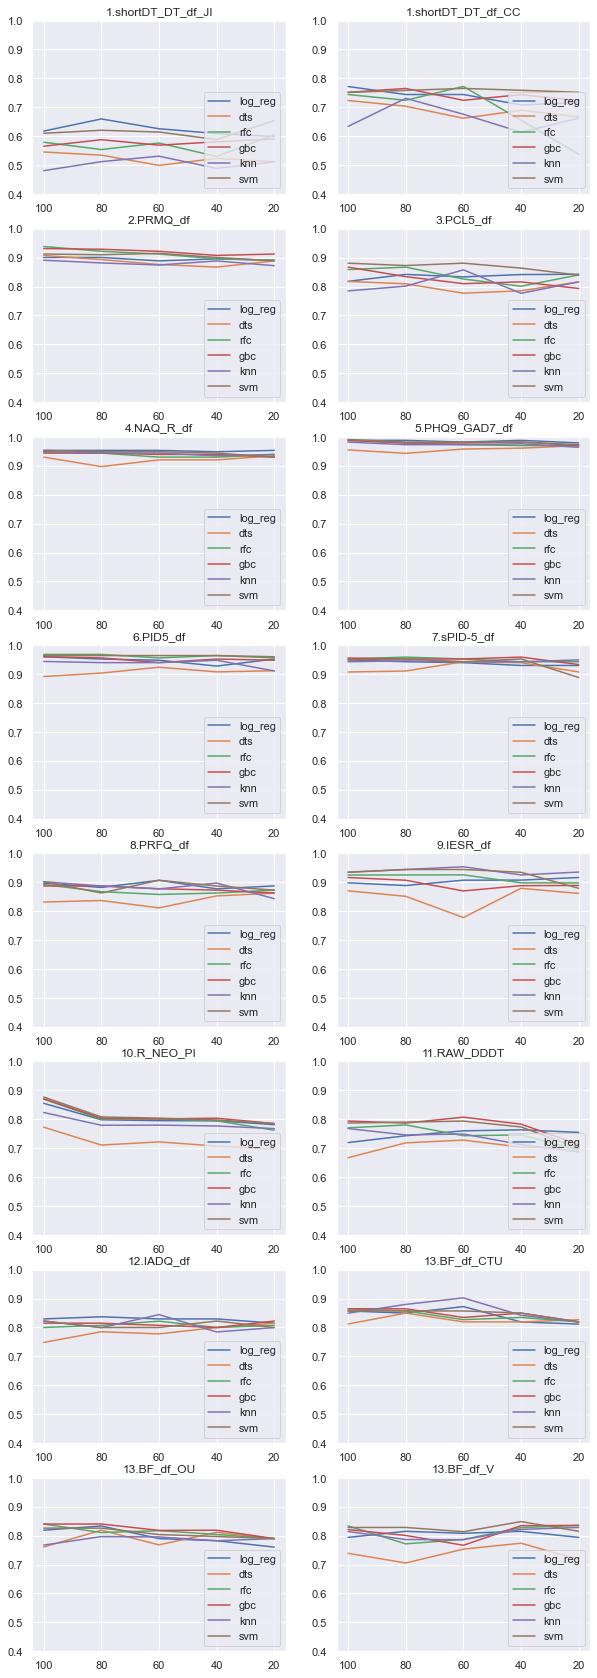

In [60]:
fig, axs = plt.subplots(8,2, figsize=(10, 30))
all_axs = []
for row in axs:
    all_axs.extend(row)
for i, ax in enumerate(all_axs):
    display_performance_drop([
        initial_res['performance'],
        pipeline_res['performance_80perc'],
        pipeline_res['performance_60perc'],
        pipeline_res['performance_40perc'],
        pipeline_res['performance_20perc']], initial_res['performance'].index.values[i], ax)
    
# plt.savefig('../results/pipeline_performance_drop.png')

#### Comment
The f1 score using the entire sets of variables is almost for all the datasets above 0.85, except for 1.shortDT_DT_df_JI, in which the performance is below 0.65. Removing features doesn't change the performance significantly. There are also in this case some exceptions, for example:
- when applying factor analysis on 13.BF_df_OU dataset, reducing progressively the number of remaining features makes accuracies heavily decrease for all the models in the same way (about 0.8 -> 0.55),
- again with factor analysis, 13.BF_df_V shows a performance decrease, but just for knn and svm models (about 0.8 -> 0.55).

Datasets 4.NAQ_R_df, 5.PHQ9_GAD7_df, 6.PID5_df, 7.sPID-5_df are particularly stable in performance, with all the models and with all the feature selection techniques.

### Concordance between models
After evaluating f1 scores for different approaches, we tryied to summarize the concordance between the different models in classifying the same features according to their importance. To do that we took the dataframes containing the importance assigned by each model to each feature (that you can see in the last part of this section in the form of heatmaps), and applyied the Spearman's rank correlation on them. We obtained for each of the datasets a correlations matrix, which we then averaged to obtain a single per-dataset coefficient. You can find this concordance coefficients in the "Rank correlations coefficients" heatmap (green heatmap).

In [48]:
from scipy.stats import spearmanr

def heatmap_to_coefficient(heatmap):
    ''' Computes the average of the spearman's rank correlation coefficient among pairwise comparisons between columns '''
    s = spearmanr(heatmap)
    sum_values = np.tril(s,-1).sum()
    num_values = (heatmap.shape[1]*heatmap.shape[1] - heatmap.shape[1])/2
    return sum_values/num_values

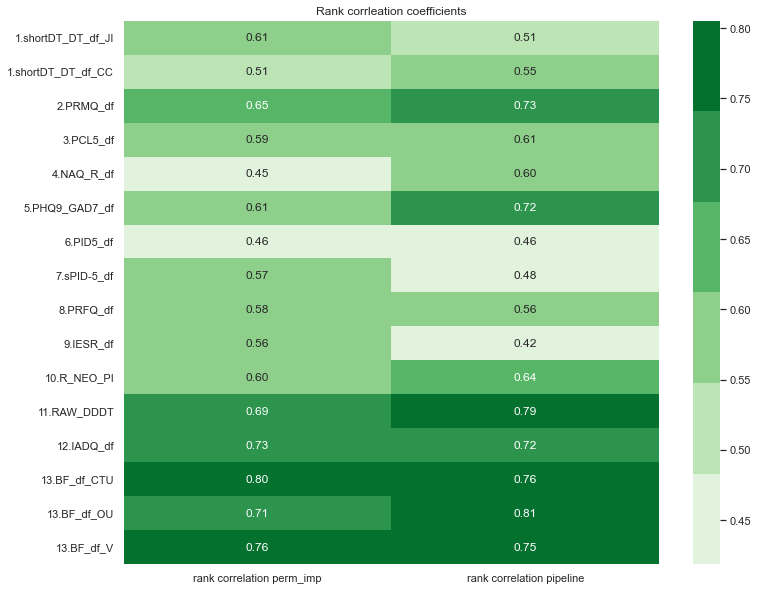

<Figure size 432x288 with 0 Axes>

In [54]:
coeffs_permimp = []
for ds in perm_imp_res['importances'].keys():
    coeffs_permimp.append(heatmap_to_coefficient(perm_imp_res['importances'][ds]))

coeffs_pipeline = []
for ds in pipeline_res['importances'].keys():
    coeffs_pipeline.append(heatmap_to_coefficient(pipeline_res['importances'][ds]))

coeffs_df = pd.DataFrame({'rank correlation perm_imp': coeffs_permimp, 'rank correlation pipeline': coeffs_pipeline}, index=perm_imp_res['importances'].keys())
      
colormap = sns.color_palette("Greens")
sns.set(rc = {'figure.figsize' : (12, 10)})
sns.heatmap(coeffs_df, annot = True, fmt=".2f",cmap=colormap)
plt.title('Rank corrleation coefficients')
plt.show() # To visualize figures
sns.reset_orig()
plt.clf()



In [65]:
great1 = coeffs_df.index[coeffs_df['rank correlation perm_imp'] > 0.50]
great2 = coeffs_df.index[coeffs_df['rank correlation pipeline'] > 0.50]
print(len(great1))
print(len(great2))

14
13


In [66]:
great1 = coeffs_df.index[coeffs_df['rank correlation perm_imp'] > 0.60]
great2 = coeffs_df.index[coeffs_df['rank correlation pipeline'] > 0.60]
print(len(great1))
print(len(great2))

8
10


In [67]:
great1 = coeffs_df.index[coeffs_df['rank correlation perm_imp'] > 0.70]
great2 = coeffs_df.index[coeffs_df['rank correlation pipeline'] > 0.70]
print(len(great1))
print(len(great2))

4
7


In [68]:
great1 = coeffs_df.index[coeffs_df['rank correlation perm_imp'] > 0.80]
great2 = coeffs_df.index[coeffs_df['rank correlation pipeline'] > 0.80]
print(len(great1))
print(len(great2))

1
1


#### Comment
We counted for both methodshow many datasets yieald a rank correlation coeffient higher than a certain threshold. We observed that in general the pipeline leads to a higher count. \
We couldn't identify any relation between the good/bad nature of the dataset and it's rank correlation coefficient.

In [55]:
def display_heatmap(heatmap, title='title', ax=None):
    if(ax==None):
        sns.set(rc = {'figure.figsize' : (12, 10)})
        sns.heatmap(heatmap, annot = True, fmt=".2f")
        plt.show() # To visualize figures
        sns.reset_orig()
        plt.clf()
    else:
        ax.set_title(title)
        sns.set(rc = {'figure.figsize' : (12, 10)})
        sns.heatmap(heatmap, annot = True, fmt=".2f",ax=ax)

1.shortDT_DT_df_JI
1.shortDT_DT_df_CC
2.PRMQ_df
3.PCL5_df
4.NAQ_R_df
5.PHQ9_GAD7_df
6.PID5_df
7.sPID-5_df
8.PRFQ_df
9.IESR_df
10.R_NEO_PI
11.RAW_DDDT
12.IADQ_df
13.BF_df_CTU
13.BF_df_OU
13.BF_df_V


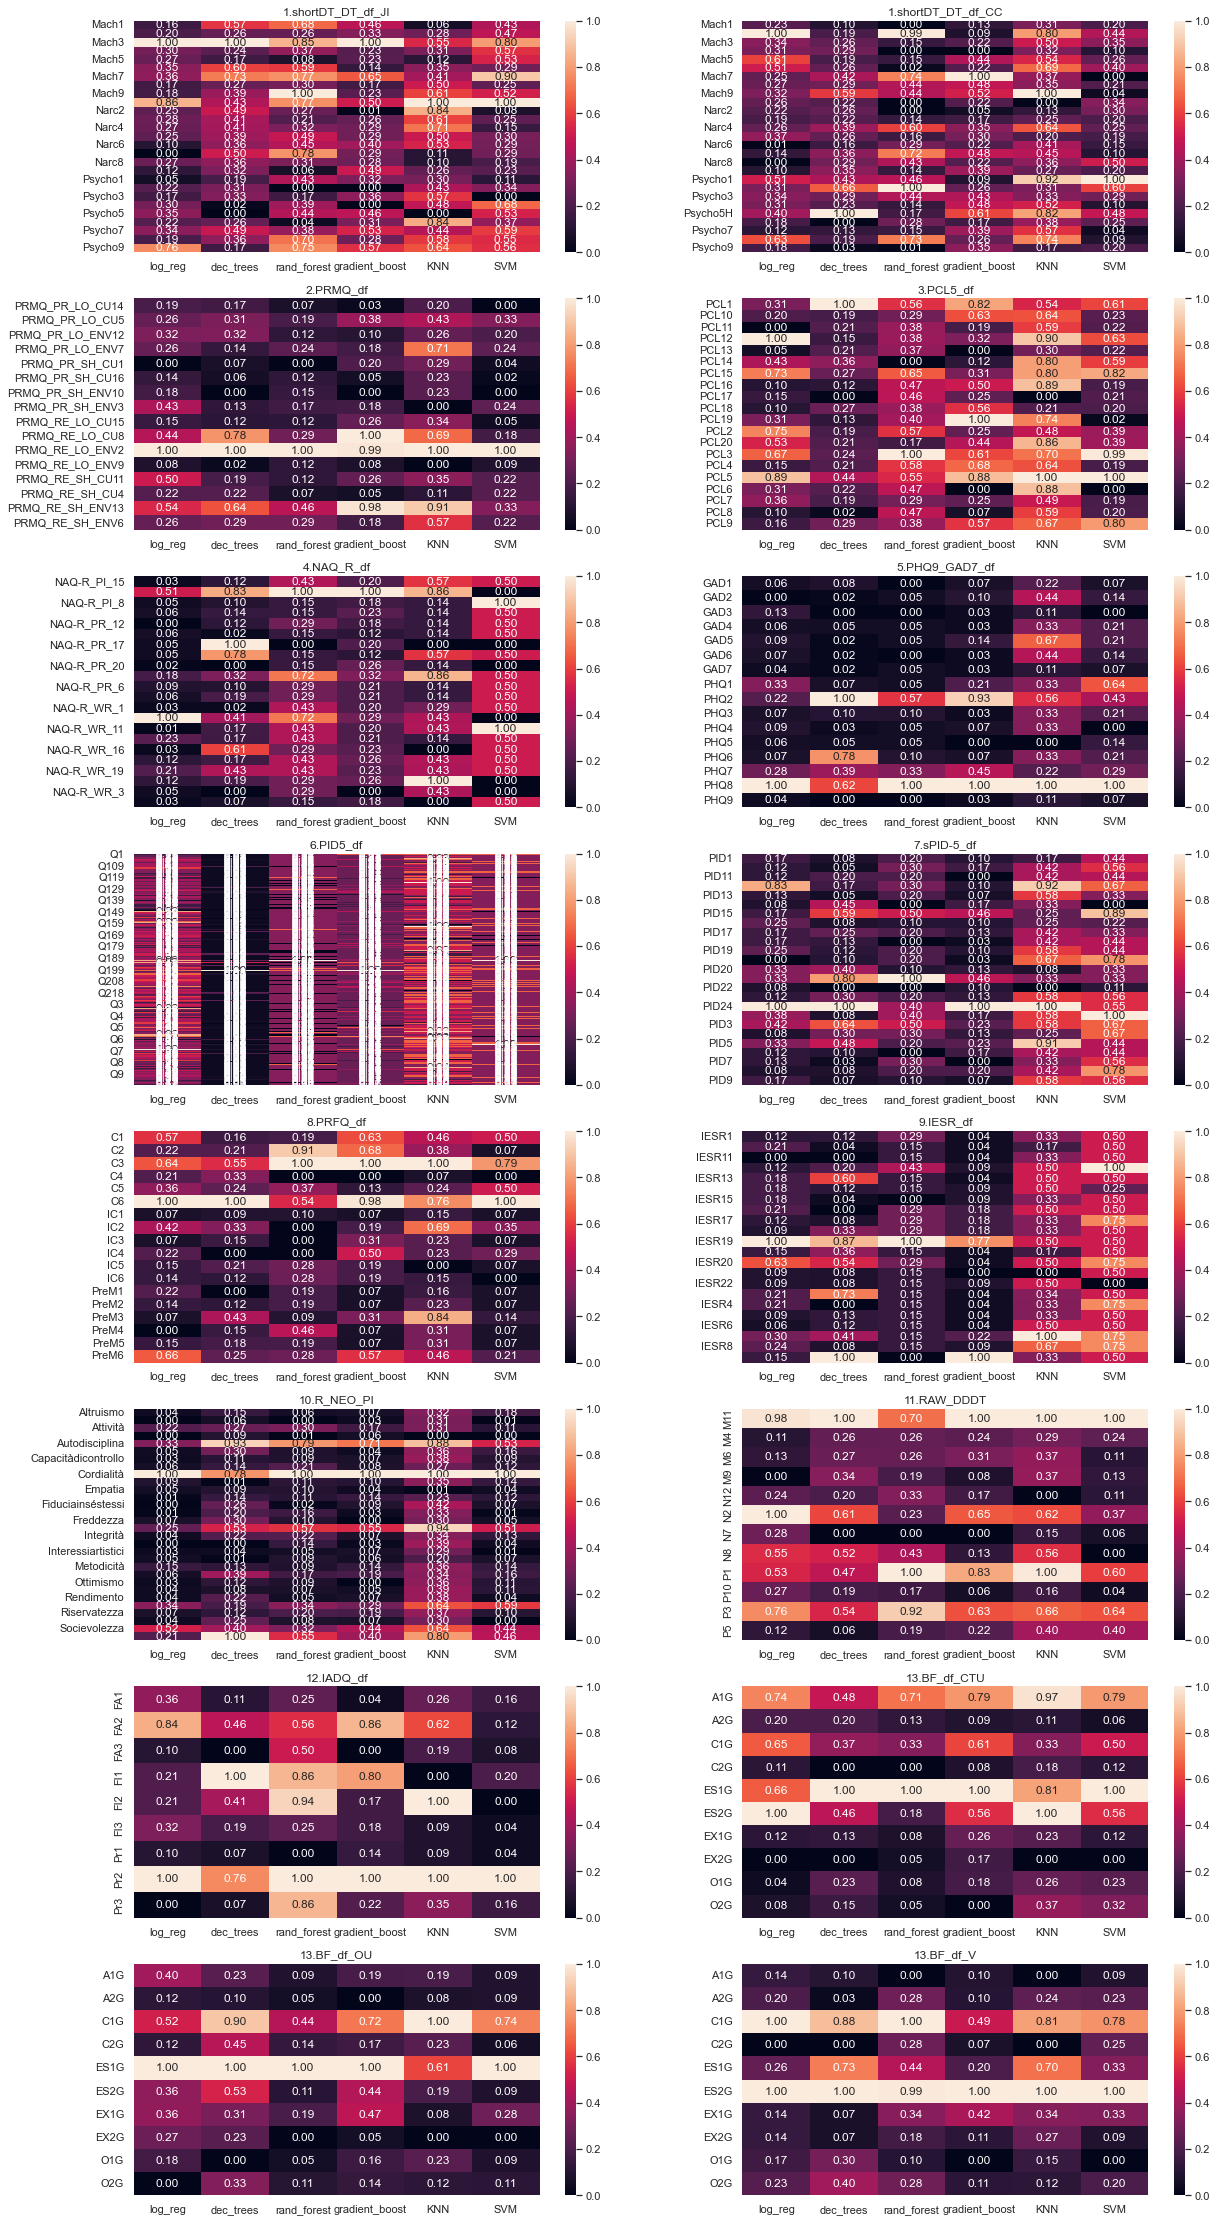

In [58]:
fig,axs = plt.subplots(8,2, figsize=(20,40))
all_axs = []
for row in axs:
    all_axs.extend(row)
datasets_names = list(perm_imp_res['importances'].keys())
for i,ax in enumerate(all_axs):
    print(datasets_names[i])
    display_heatmap(perm_imp_res['importances'][datasets_names[i]], datasets_names[i], ax)

## Conclusions

The aim of the project was to find a procedure for feature selection, which was compliant with two main requirements:
- the performance of machine learning models on the the dataset with just the selected features would have to be similar to the one obtained using all the features.
- the importance assigned to the features would have to be similar across models.

We used 4 techniques for feature selection:
- information gain
- factor analysis
- permutation importance
- pipeline = information gain + permutation importance

As regards to the performance drops, we showed in Results section that all of the 4 techinques presented an impressive stability. Apart for some exceptions, the performance (f1 score) decreased at most of 10 points when comparing the test on the full dataset and the one with just 20% of the features. \
Regarding the stability of the selection across models, we have to point out the fact that information gain and factor analysis are by default consistent in features selection, since they don't depend on a model to determine the importance of feature. Analyzing the other two techinques we observed that the concordance across models changed widely from dataset to dataset. We couldn't even find any relation between the concordance coefficient (see Results section) and the characteristics of the dataset. The only significant observation we could extract from the analysis was that the pipeline method had in general a slightly higher tendency for concordance. \
As a final result we point out that, considering the two requirements listed above, information gain and factor analysis are the best approaches we have found for selecting features respecting the replicability principle. \
Our research could be enriched adding some other feature selection techiques, in particular we didn't touch model dependent tecniques, such as lasso regression, and wrapper methods, such as step-forward/backward feature selection. We also thought about neural network techinques, such as autoencoders, but we would need datasets with a much higher amount of records, to avoid overfitting/underfitting problems. Another interesting research topic would be relief feature selection.